# Breast Cancer Analysis - Final Project



## Introduction

This dataset is based on the digitized image of fine needle aspirate (FNA) of breast mass conducted on women in Wisconsin. It contains information about the appearance (such as size, texture, symmetry, etc.) of the FNA samples, as well as if the FNA sample was categorized as malignant or benign. The data was collected from January 1989 to November 1991. 

In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objs as go

from scipy.optimize import minimize
from scipy import stats

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm, metrics, tree, ensemble
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['lines.linewidth'] = 3
sns.set()

Install packages

In [6]:
!pip install factor_analyzer 
from factor_analyzer import calculate_kmo

In [7]:
!pip install mlxtend
from mlxtend.plotting import plot_decision_regions
from mlxtend.plotting import plot_decision_regions

## Breast Cancer Analysis

The code below will load all the digitalized breast mass data. We start off by just loading them all.

In [10]:
df = pd.read_csv("data.csv")

In [11]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [12]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

The variables are:

1) **id**
2) **diagnosis**: M = malignant, B = benign

For each nucleus the mean value, largest (or 'worst') value, and standard error calculated for each:

3) **radius**: mean of distances from center to points on the perimeter
4) **texture**: standard deviation of gray-scale values
5) **perimeter**
6) **area**
7) **smoothness**: local variation in radius lengths
8) **compactness**: perimeter^2 / area - 1.0
9) **concavity**: severity of concave portions of the contour
10) **concave_points**: number of concave portions of the contour
11) **symmetry**
12) **fractal_dimension**: "coastline approximation" - 1



The code below counts the number of nulls in each feature.

In [16]:
# drop null column
df = df.drop(columns=['Unnamed: 32'])

# diagnosis column
df['diagnosis'] = np.where(df['diagnosis'] == 'M', 1, 0)
df.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

Because there was a column of all nulls, that column will be deleted. This makes it so that important variables are kept and could possibly help answer our questions. Since the diagnosis column is in words, ‘malignant’ and ‘benign’, we use one-hot-encoding to make the columns 0 and 1’s. Let 1 indicate a malignant cancer diagnosis, and 0’s for benign. 


In [18]:
counts = df['diagnosis'].value_counts()
print(counts)

diagnosis
0    357
1    212
Name: count, dtype: int64



## Feature Selection



Since there are over 13 features, we want help determining which ones will be the most useful in data analysis. This allows us to find the most influential features to prioritize during other model training. Also, by focusing on important features, this will prevent the model from becoming overfitted. 

Random forests work by building numerous decision trees in training. By using the sklearn randomForestClassifier model, it begins with bootstrapping samples. At each split, the algorithm selects the best feature from the random subset, optimizing for information gain or Gini impurity. This handles large datasets and high-dimensional data very well, which in our situation is the case. By combining the predictions from many decision trees, it reduces the risk of overfitting. There were no specific hyperparameters specified. 
After fitting the data to the model, the feature importance feature is used. We then put this in a dataframe and sort the importance in ascending value. 


In [20]:
# split into features and target
X = df.drop(columns=['diagnosis', 'id'])
Y = df['diagnosis']

In [21]:
# split data to training and test data


# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=109) #70% training

In [22]:


# Train random forest and get feature importances
model = RandomForestClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_


In [23]:
# Display feature importances
feature_importances = pd.DataFrame({
    'feature' : X_train.columns,
    'importance' : importances
}).sort_values(by = 'importance', ascending = False)

feature_importances

feature  importance
7       concave points_mean    0.126893
27     concave points_worst    0.118359
23               area_worst    0.094421
20             radius_worst    0.090120
6            concavity_mean    0.085715
22          perimeter_worst    0.081824
26          concavity_worst    0.067620
3                 area_mean    0.051289
2            perimeter_mean    0.041015
0               radius_mean    0.036989
13                  area_se    0.020943
21            texture_worst    0.020943
5          compactness_mean    0.020369
25        compactness_worst    0.019562
1              texture_mean    0.016775
12             perimeter_se    0.012933
28           symmetry_worst    0.010962
29  fractal_dimension_worst    0.009853
24         smoothness_worst    0.009419
10                radius_se    0.008189
19     fractal_dimension_se    0.007646
16             concavity_se    0.007334
4           smoothness_mean    0.006326
17        concave points_se    0.006144
11               texture_se    0.005848
14            smoothness_se    0.005101
8             symmetry_mean    0.004729
18              symmetry_se    0.004532
15           compactness_se    0.004101
9    fractal_dimension_mean    0.004048

We put this in a graph to have better visualization of the feature importance.

<Axes: xlabel='feature'>

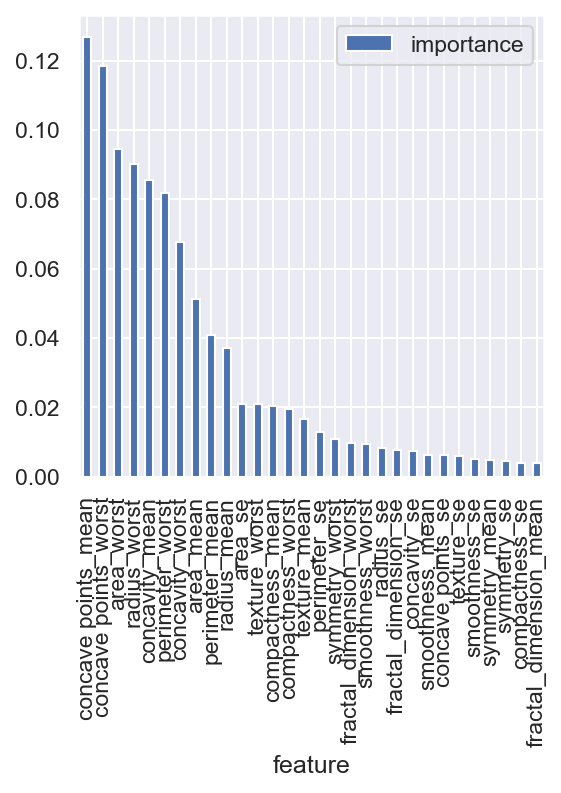

In [25]:
# Display histogram
feature_importances.set_index('feature').plot(kind = 'bar')

It is clear that the concave_mean and concave_points_worst are the most important. The top few are all related to concavity, thus, it is probable that concavity is one of the most important features. The next ones are the area and the perimeter of the mass. Thus, this may be the next most important feature to use in future models. 

## Correlation Matrix


Using the above feature importance, the data will be put into a matrix to help determine the correlation to each other. By seeing more correlated features, we can eliminate them when training models so multicollinearity does not occur. 

We reduced the feature importance to only allow those with an importance of more than or equal to 0.02. A heat map was used to illustrate the matrix so it is easier to read and figure out correlations. The cool warm palette was used for better color representation. 


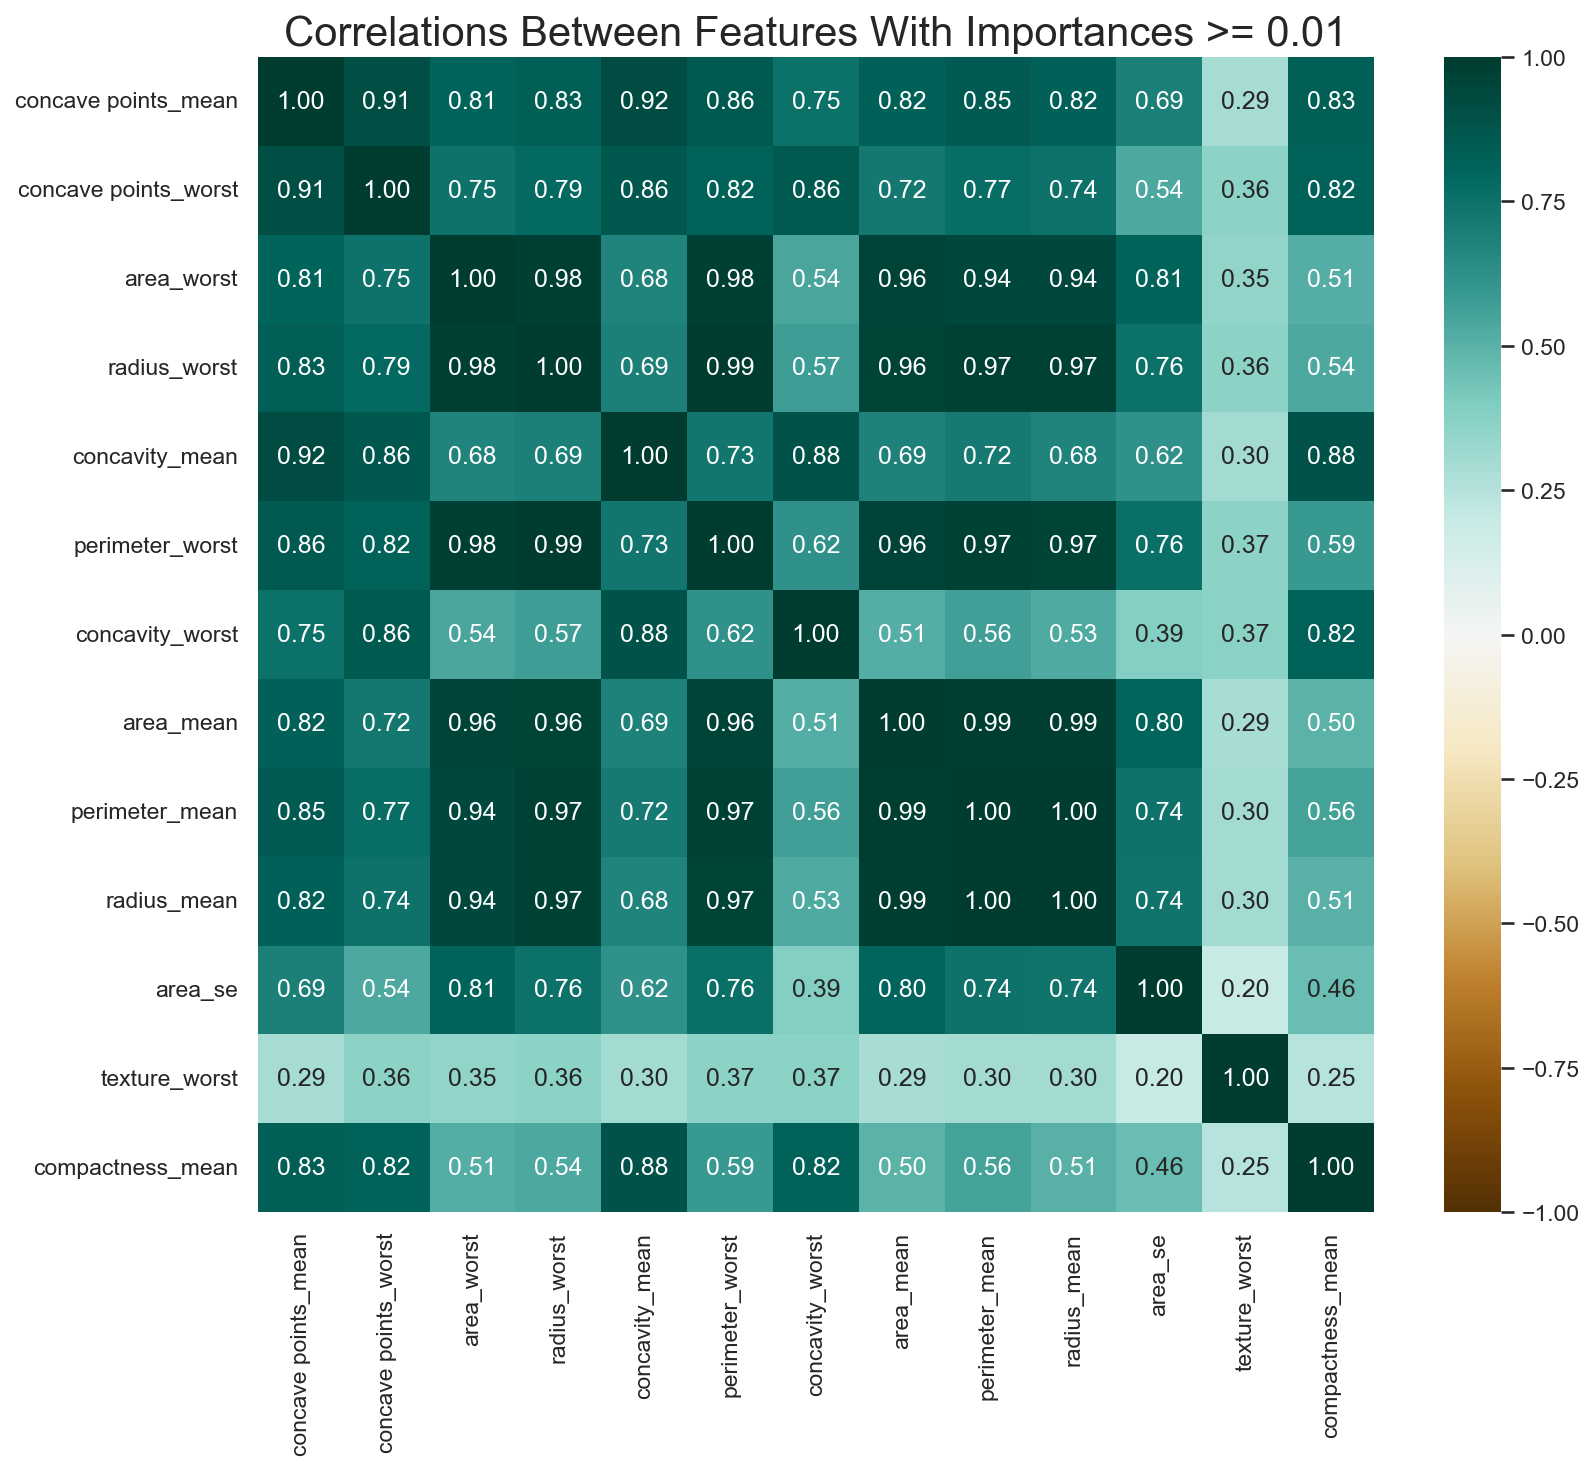

In [28]:
# Get features with importance >= 0.01
important_features = feature_importances.query('importance >= 0.02')['feature']

# Get subset of DataFrame
important_df = df[list(important_features)]

# Start by creating the correlation matrix:
df_corr = important_df.corr(numeric_only = True)

# Using heatmap to create a correlation plot
plt.figure(figsize=(12, 10))
sns.heatmap(
    data = df_corr,
    annot = True, # Show the correlation values,
    fmt = '.2f', # Round to 2 decimal places
    vmin = -1,
    vmax = +1,
    cmap = 'BrBG'
)
plt.title('Correlations Between Features With Importances >= 0.01', fontsize=20);

To find the pairs easier for our own knowledge, a list of highly correlated pairs was created. If the correlation between the two features is greater than 0.8, they are added to this list. This also makes sure that if one feature is the same as another it is not added to the list because it is the same feature. 

In [30]:
# Find pairs of features with high correlations
significant_correlations = []
for x in list(df_corr.index):
    for y in list(df_corr.columns):
        if not (x == y) and df_corr[y][x] >= 0.8:
            pair = [x, y]
            if set(pair) not in [set(i) for i in significant_correlations]:
                significant_correlations.append(pair)
significant_correlations

[['concave points_mean', 'concave points_worst'],
 ['concave points_mean', 'area_worst'],
 ['concave points_mean', 'radius_worst'],
 ['concave points_mean', 'concavity_mean'],
 ['concave points_mean', 'perimeter_worst'],
 ['concave points_mean', 'area_mean'],
 ['concave points_mean', 'perimeter_mean'],
 ['concave points_mean', 'radius_mean'],
 ['concave points_mean', 'compactness_mean'],
 ['concave points_worst', 'concavity_mean'],
 ['concave points_worst', 'perimeter_worst'],
 ['concave points_worst', 'concavity_worst'],
 ['concave points_worst', 'compactness_mean'],
 ['area_worst', 'radius_worst'],
 ['area_worst', 'perimeter_worst'],
 ['area_worst', 'area_mean'],
 ['area_worst', 'perimeter_mean'],
 ['area_worst', 'radius_mean'],
 ['area_worst', 'area_se'],
 ['radius_worst', 'perimeter_worst'],
 ['radius_worst', 'area_mean'],
 ['radius_worst', 'perimeter_mean'],
 ['radius_worst', 'radius_mean'],
 ['concavity_mean', 'concavity_worst'],
 ['concavity_mean', 'compactness_mean'],
 ['perime

This all seems to make sense. All the concave features seem to be highly correlated, which makes sense. This is also true with ones related to area, perimeter, and radius. This makes sense since all these features are related to a circle and can be based off each other to figure out what another feature is. 

# PCA

In [33]:
# Remove standard error columns
df_pca = df.drop(columns=['radius_se', 'texture_se', 'perimeter_se',
                      'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
                      'concave points_se', 'symmetry_se', 'fractal_dimension_se'])
df_pca

id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760         0.30010   
1       1326.0          0.08474           0.07864         0.08690   
2       1203.0          0.10960           0.15990         0.19740   
3        386.1          0.14250           0.28390         0.24140   
4       1297.0          0.10030           0.13280         0.19800   
..         ...              ...               ...             ...   
564     1479.0          0.11100           0.11590         0.24390   
565     1261.0          0.09780           0.10340         0.14400   
566      858.1          0.08455           0.10230         0.09251   
567     1265.0          0.11780           0.27700         0.35140   
568      181.0          0.05263           0.04362         0.00000   

     concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                0.14710  ...        25.380          17.33           184.60   
1                0.07017  ...        24.990          23.41           158.80   
2                0.12790  ...        23.570          25.53           152.50   
3                0.10520  ...        14.910          26.50            98.87   
4                0.10430  ...        22.540          16.67           152.20   
..                   ...  ...           ...            ...              ...   
564              0.13890  ...        25.450          26.40           166.10   
565              0.09791  ...        23.690          38.25           155.00   
566              0.05302  ...        18.980          34.12           126.70   
567              0.15200  ...        25.740          39.42           184.60   
568              0.00000  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0

## Check distribution of data

### Plotting histograms of each feature

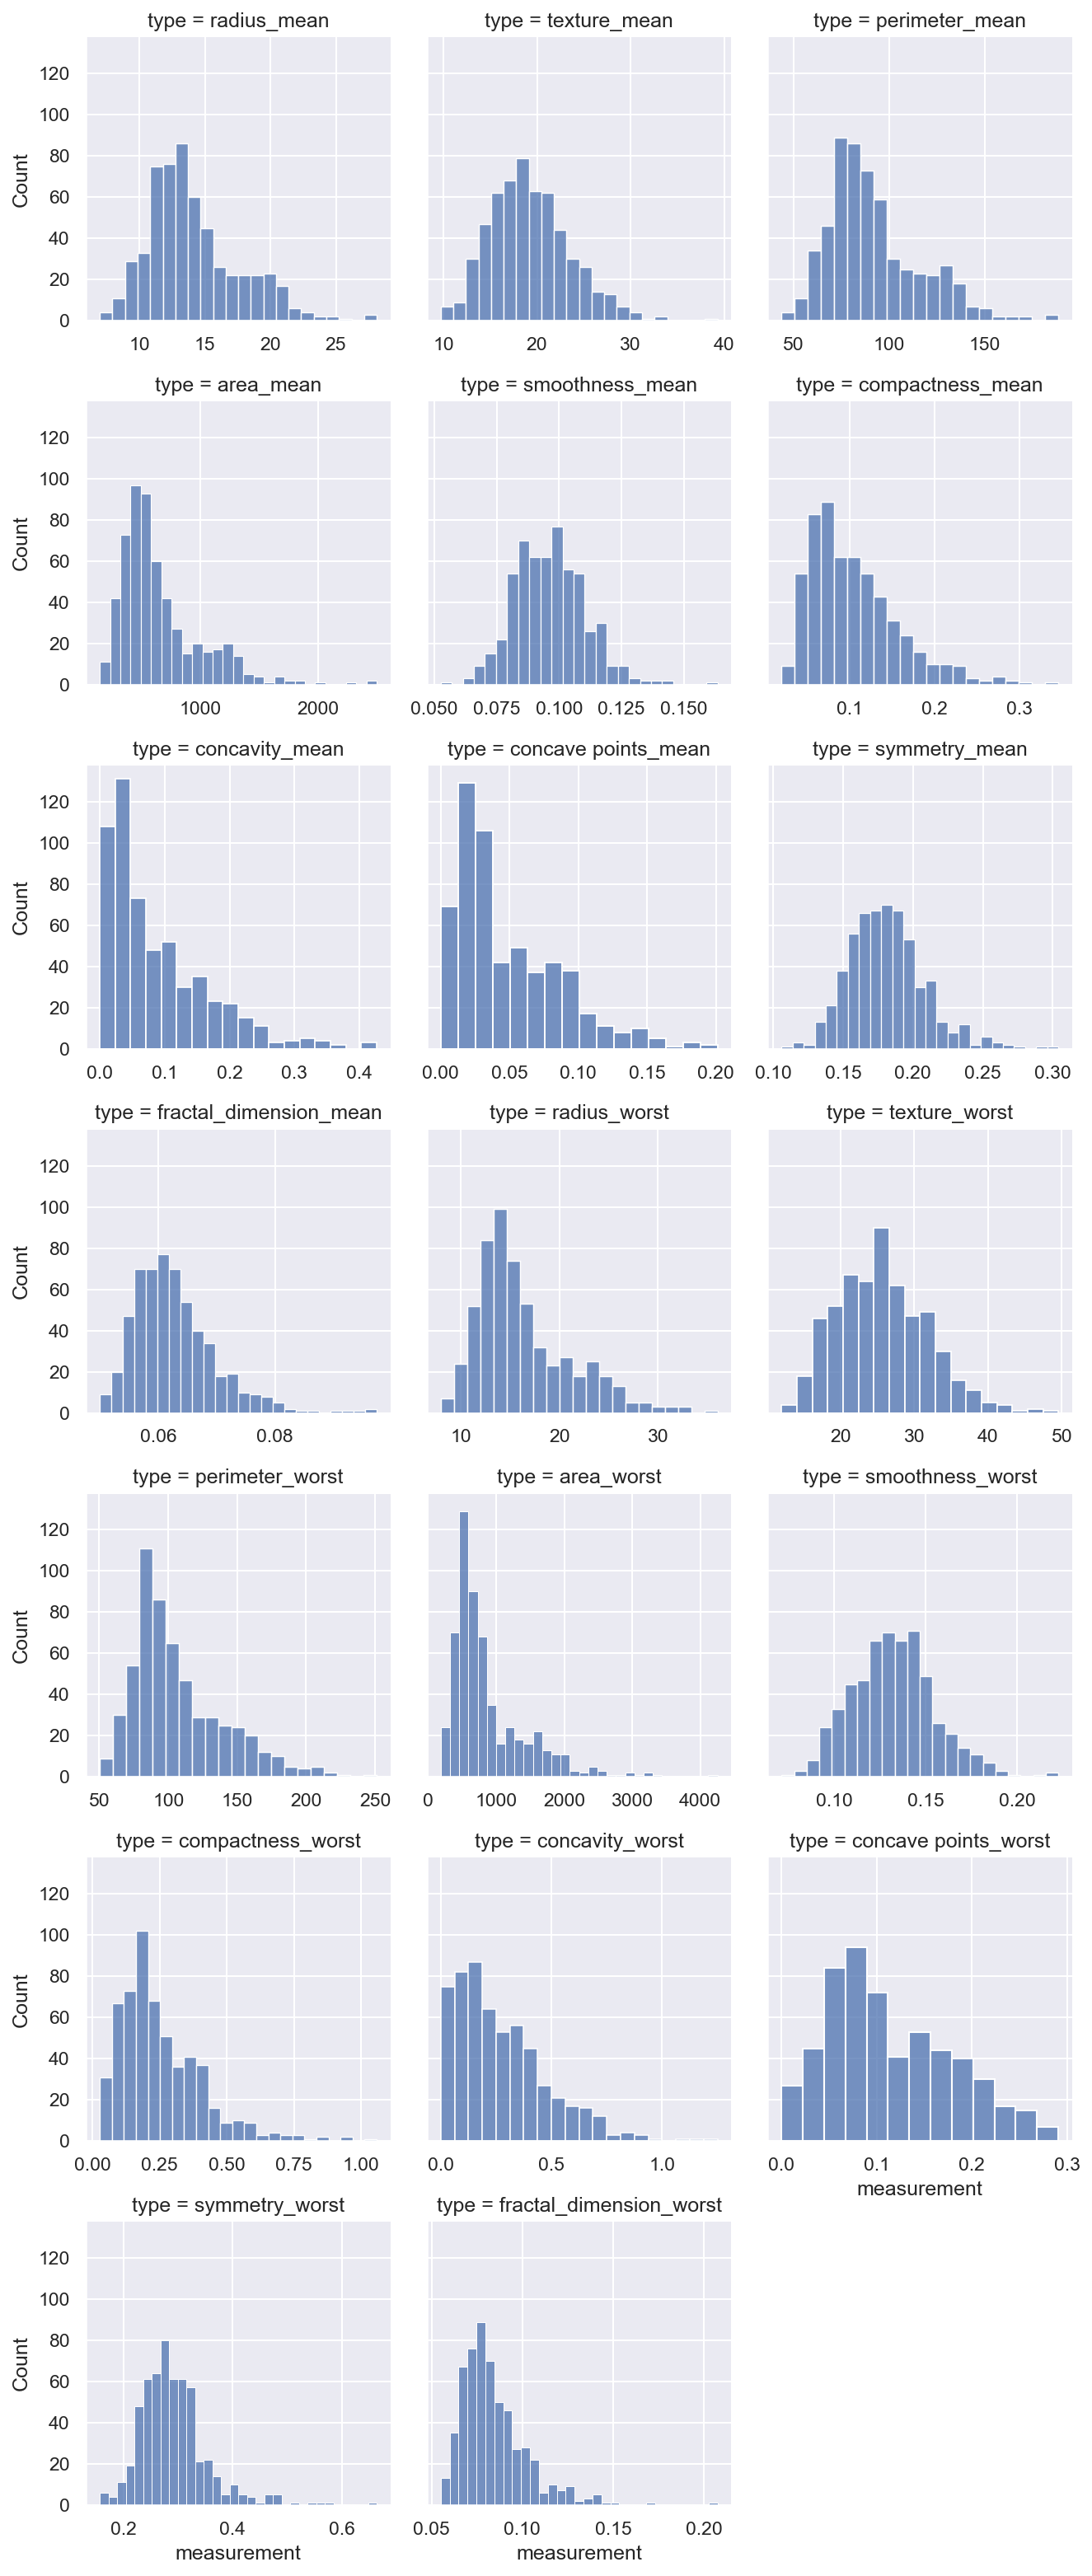

In [36]:
measurements_long = (
    df_pca
    .drop(columns = ['diagnosis', 'id'])
    .melt(var_name='type', value_name='measurement')
)

measurements_grid = sns.FacetGrid(
    data = measurements_long,
    col = 'type',
    col_wrap = 3,
    sharex = False
)

measurements_grid.map(sns.histplot, 'measurement');

Some of the features have skewed data!

### Trying to remove outliers

Removing rows that contain values that are more than 3 standard deviations from the mean

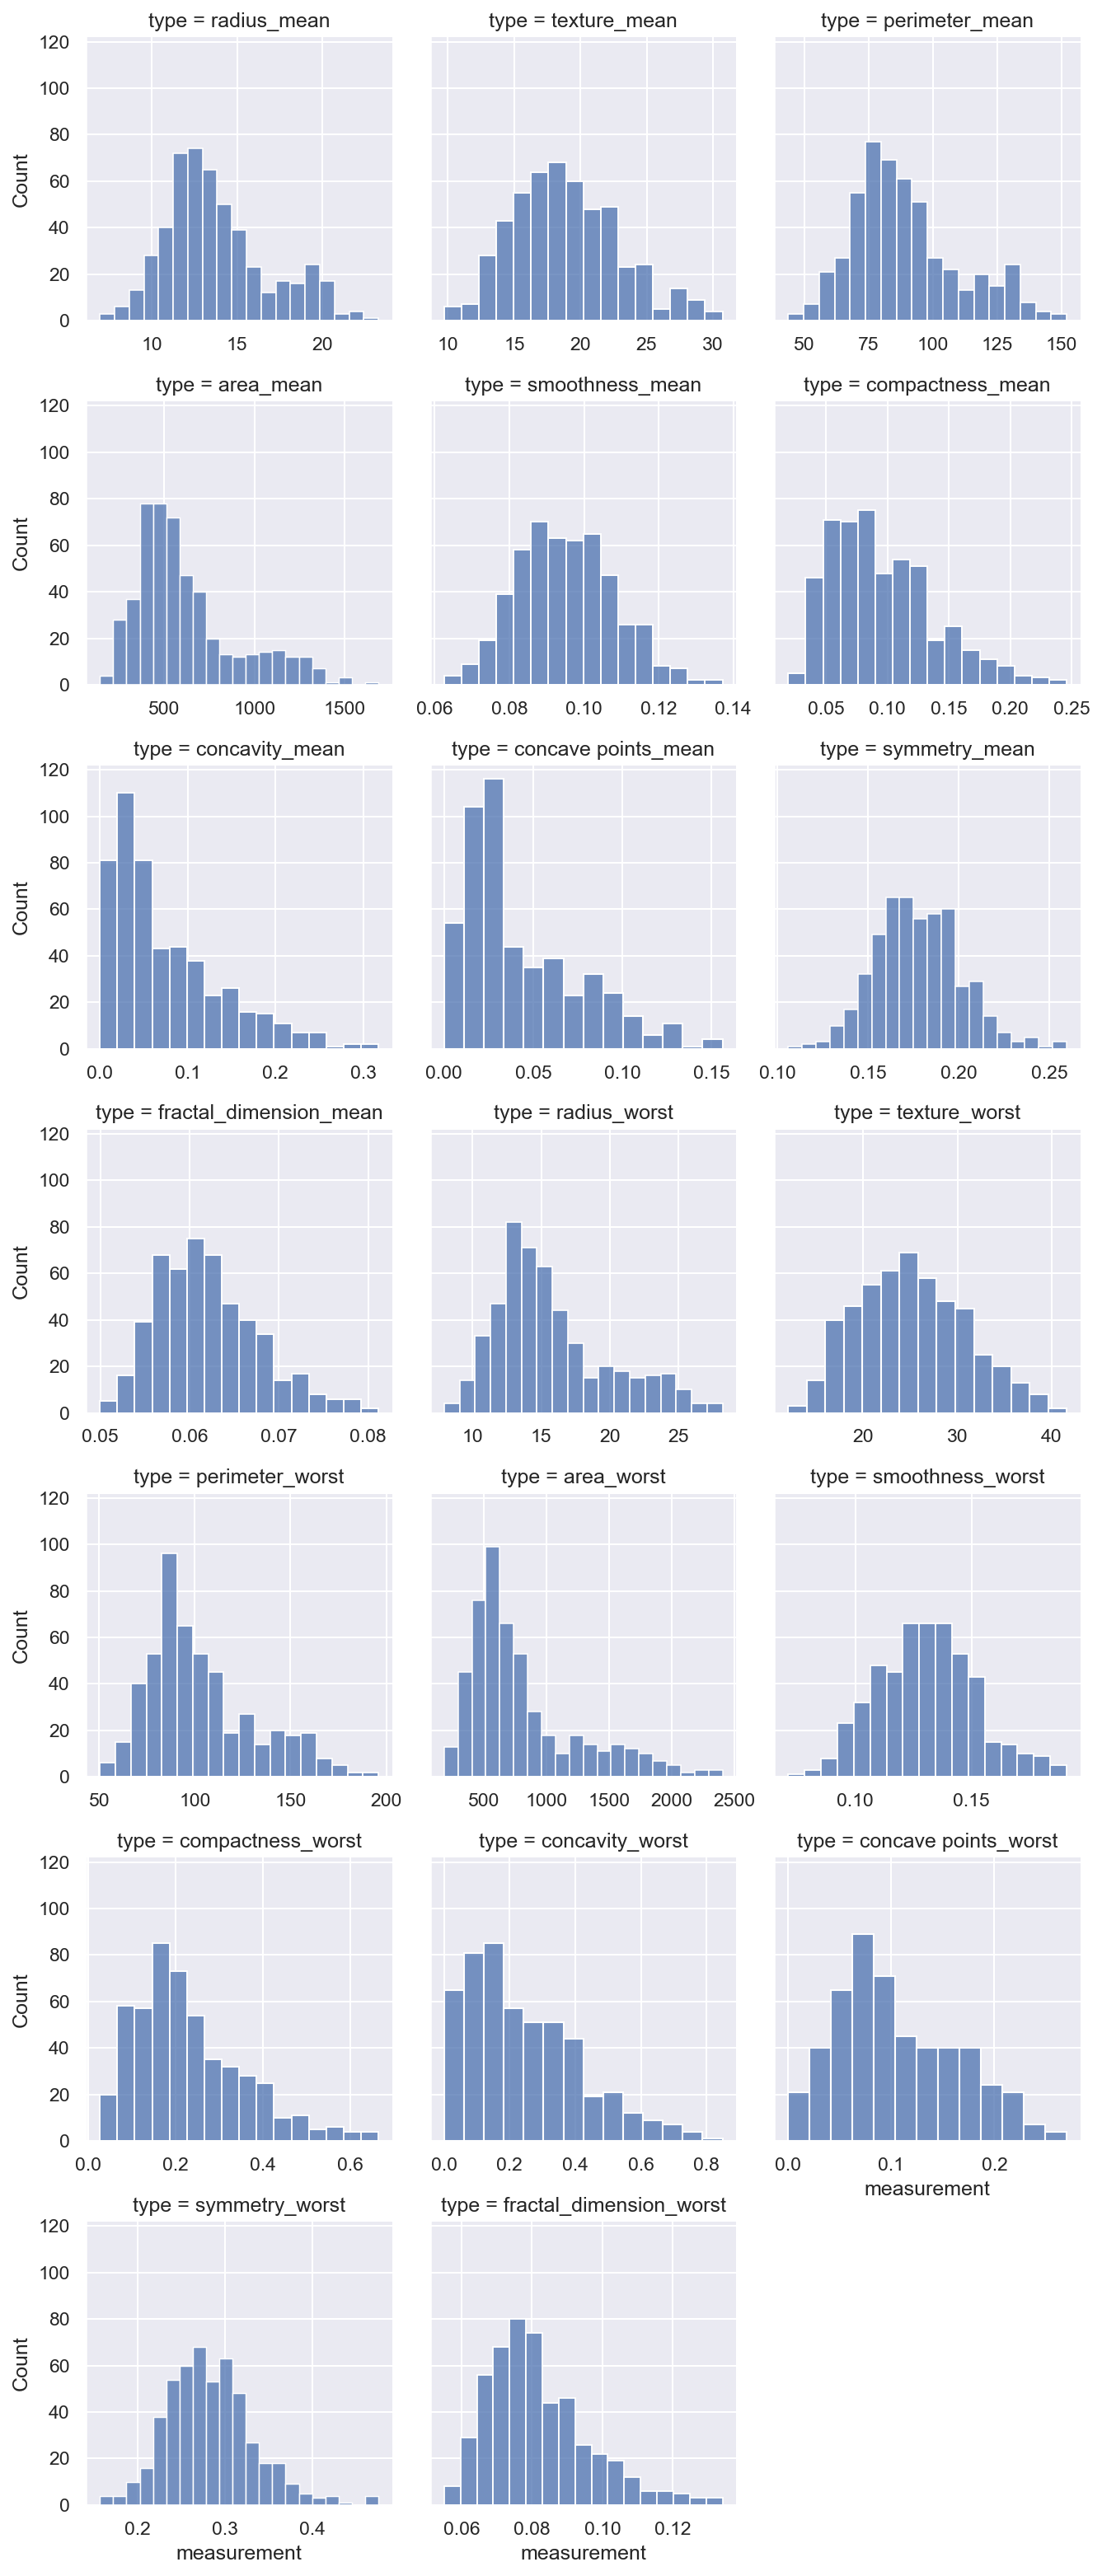

In [40]:

df_pca = df_pca[(np.abs(stats.zscore(df_pca)) < 3).all(axis=1)]

df_pca
measurements_long = (
    df_pca
    .drop(columns = ['diagnosis', 'id'])
    .melt(var_name='type', value_name='measurement')
)

measurements_grid = sns.FacetGrid(
    data = measurements_long,
    col = 'type',
    col_wrap = 3,
    sharex = False
)

measurements_grid.map(sns.histplot, 'measurement');


In [41]:
df_pca.shape

(507, 22)

Show how many malignant, 0 and benign in data using. 

In [43]:
num_benign = counts.get('B', 0)
num_malignant = counts.get('M', 0)

print(f"Benign cases: {num_benign}")
print(f"Malignant cases: {num_malignant}")


Benign cases: 0
Malignant cases: 0


41 rows were removed from the dataset, and the distributions are more symmetric, but concavity and concavity points are still skewed to the right.

### Correlation Plot

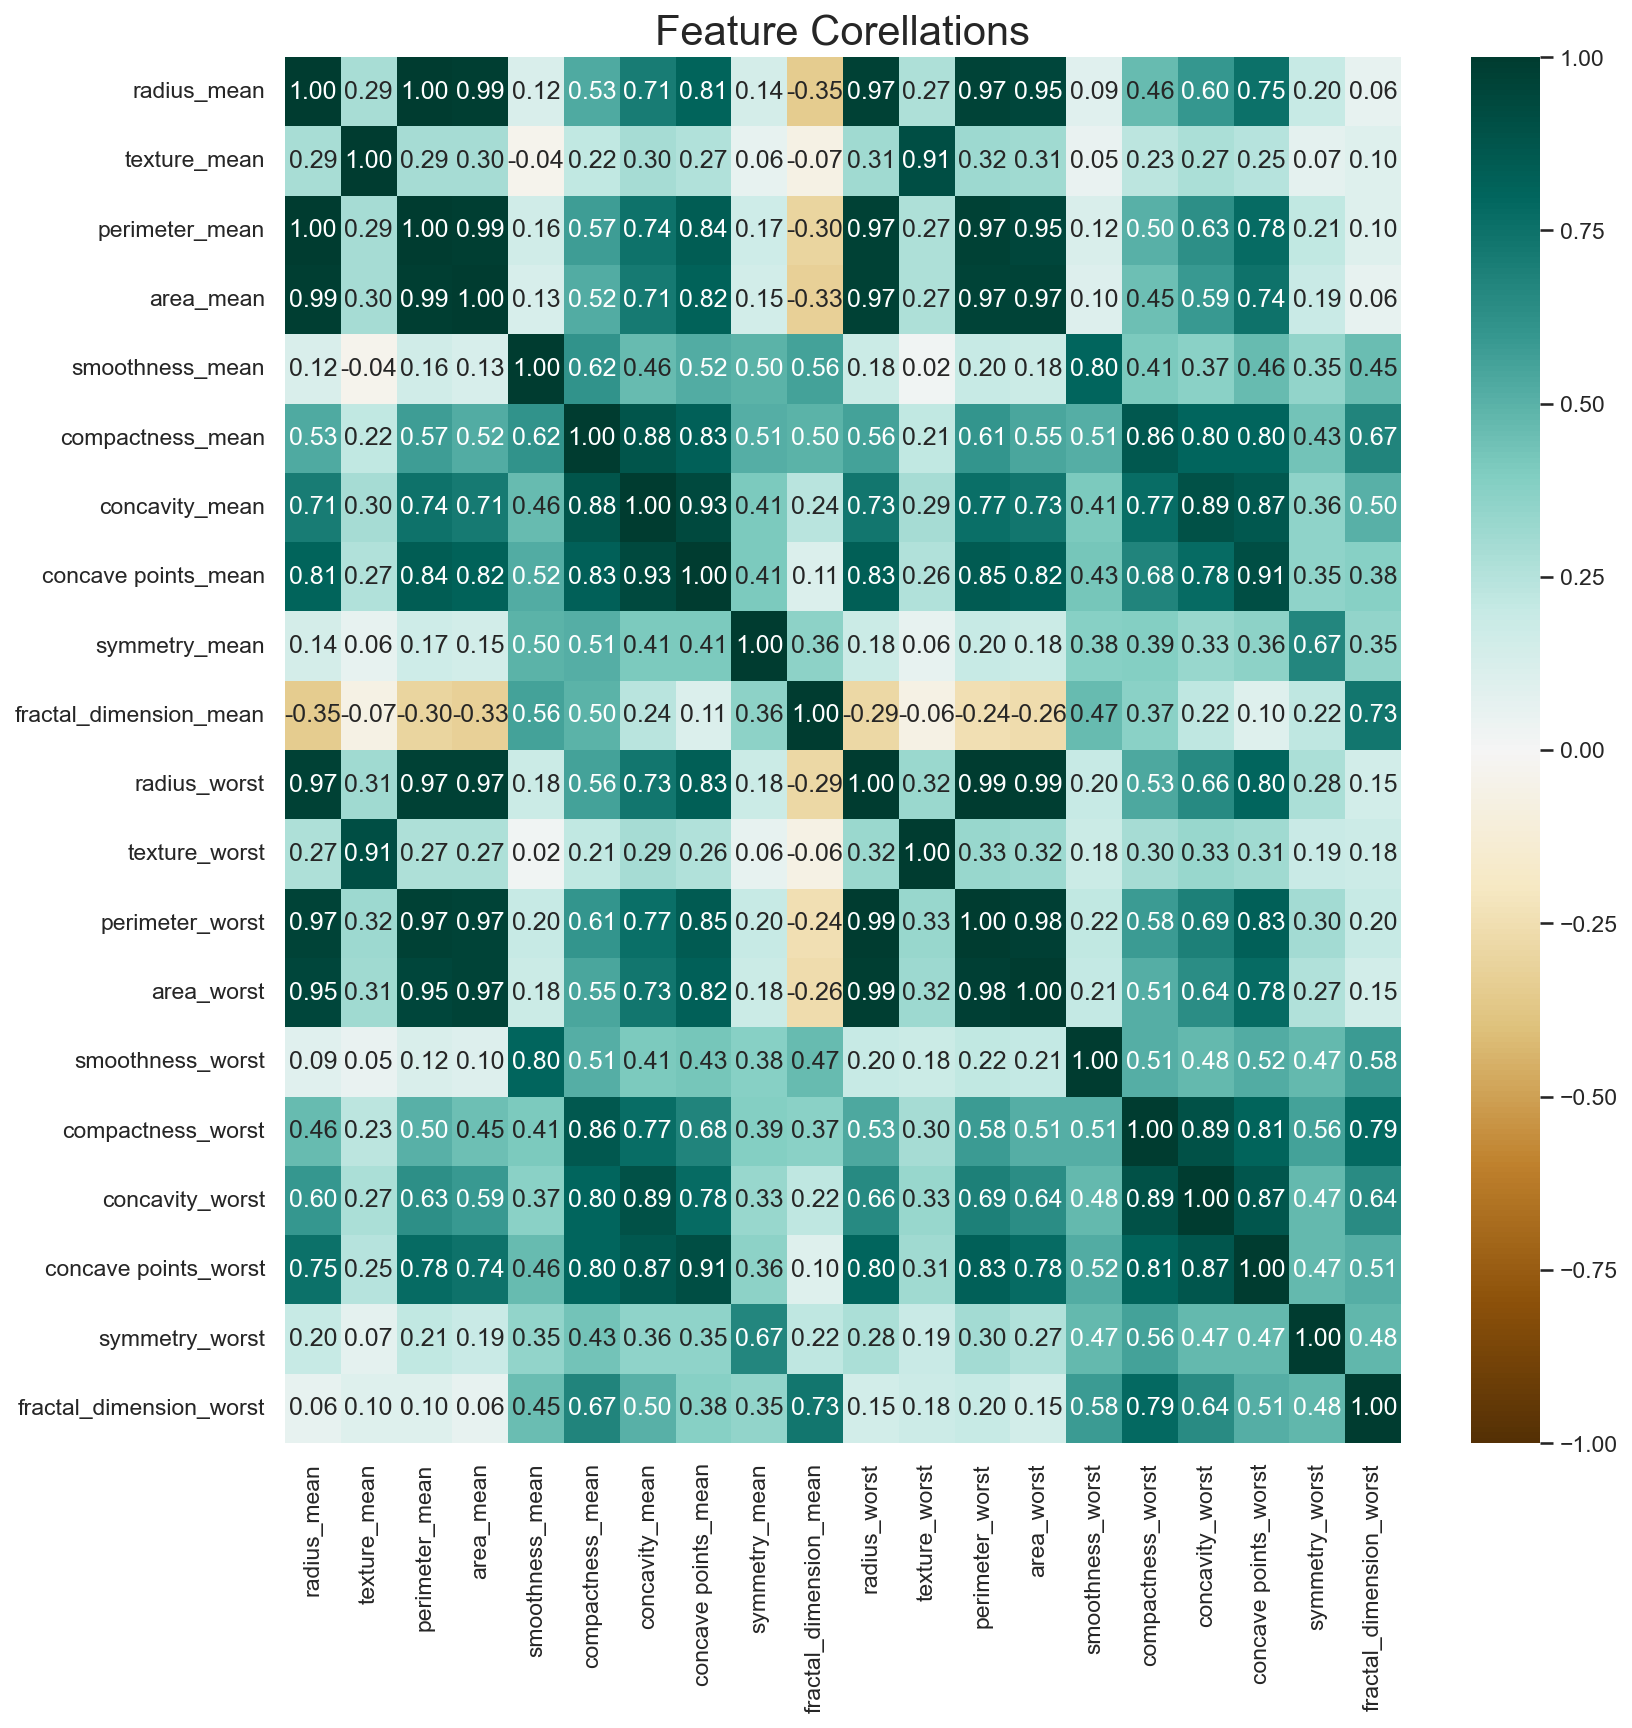

In [46]:
plt.figure(figsize = (12, 12))
sns.heatmap(
    df_pca.drop(columns = ['diagnosis', 'id']).corr(),
    annot = True,
    fmt = '.2f',
    cmap = 'BrBG',
    vmin = -1, 
    vmax = 1
)
plt.title('Feature Corellations', fontsize=20);

## Scatterplot Matrix

In [48]:
# sns.pairplot(
#     df_pca.drop(columns = 'id'),
#     hue = 'diagnosis'
# );

## Test for the KMO score

Measuring overall correlation of data

In [51]:


feat_kmo, overall_kmo = calculate_kmo(df_pca.drop(columns = ['diagnosis', 'id']))

print(f'The overall KMO score for the breast cancer data is{overall_kmo: .2f}')

The overall KMO score for the breast cancer data is 0.82


Source for legend label reordering: https://www.geeksforgeeks.org/how-to-change-order-of-items-in-matplotlib-legend/

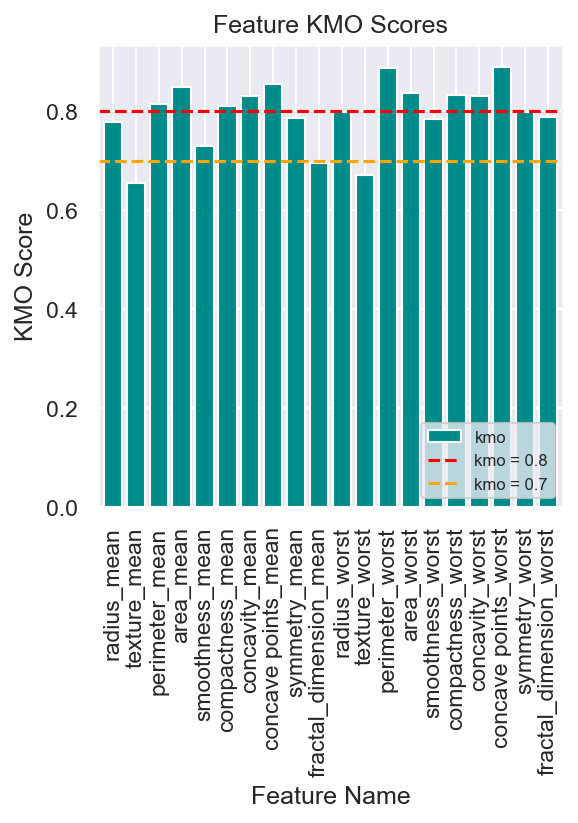

In [53]:
pd.DataFrame(
    {'kmo': feat_kmo},
    index = df_pca.drop(columns = ['diagnosis', 'id']).columns
).plot(kind = 'bar', color='darkcyan', width=0.8)

plt.axhline(0.8, color = 'red', linestyle = '--', label = 'kmo = 0.8');
plt.axhline(0.7, color = 'orange', linestyle = '--', label = 'kmo = 0.7');

# reordering the labels 
handles, labels = plt.gca().get_legend_handles_labels() 
  
# specify order 
order = [2, 0, 1] 
  
# pass handle & labels lists along with order as below 
plt.legend([handles[i] for i in order], [labels[i] for i in order], loc = 4, fontsize = 8)
plt.title('Feature KMO Scores')
plt.xlabel('Feature Name')
plt.ylabel('KMO Score')
plt.show();

### Standardizing Data

In [55]:
# Array of standardized values
df_scaler = StandardScaler()
df_scaler.fit_transform(df_pca.drop(columns = ['diagnosis', 'id']))


# Converting bones_stan to a dataframe
df_pca_stan = pd.DataFrame(
    df_scaler.transform(df_pca.drop(columns = ['diagnosis', 'id'])),
    # Adding the column names back
    #columns = bones_full.drop(columns = 'sex').columns
    columns = df_scaler.feature_names_in_
)

df_pca_stan

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       2.219611     -0.295840        2.076016   2.481312        -0.802935   
1       1.930551      0.570210        1.936923   2.050315         1.119882   
2       2.127637     -1.149447        2.181534   2.379695         0.400566   
3      -0.447623     -0.810991       -0.337959  -0.493266         2.527575   
4       1.457544      0.254152        1.438109   1.479157        -0.037985   
..           ...           ...             ...        ...              ...   
502    -0.858219      2.590994       -0.908718  -0.812484        -1.595729   
503     2.334578      1.525851        2.560441   2.554897         1.143085   
504     2.544803      0.853916        2.512478   3.017430         1.228166   
505     2.075081      2.312265        1.994479   2.253549         0.207201   
506     0.915557      2.269958        0.896127   0.841772        -0.817630   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           -0.407295        0.177377             0.804942       0.138054   
1            1.500920        1.915791             2.551437       1.221097   
2            0.864536        1.925230             1.837471       0.125411   
3            1.738097        1.292794             1.129253       1.296952   
4            0.305644        0.583269             0.920811       0.062199   
..                ...             ...                  ...            ...   
502         -1.418465       -1.189755            -1.317897      -3.031007   
503          2.996777        3.803660             3.141367       1.558231   
504          0.467676        2.647340             2.884218      -0.224365   
505          0.174140        1.075689             1.644155      -0.114797   
506          0.148309        0.265635             0.286107      -0.797494   

     fractal_dimension_mean  radius_worst  texture_worst  perimeter_worst  \
0                 -0.947053      2.239481      -0.312144         1.954621   
1                 -0.367644      1.894930       0.058256         1.732101   
2                 -0.570088      1.645010      -1.489737         1.721505   
3                  2.449125     -0.070466      -0.252740        -0.002140   
4                 -0.816163      1.727508       0.430404         1.756825   
..                      ...           ...            ...              ...   
502               -1.235013     -0.931843       2.289393        -0.998534   
503                1.168141      2.069632       0.736158         2.671629   
504               -1.023843      2.351096       0.210260         2.212461   
505               -1.180912      1.924047       2.280657         1.820402   
506               -0.980212      0.781206       1.559076         0.820830   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2.548869         -0.309728          -0.356985         0.001388   
1      1.998469          0.657229           1.529104         1.209481   
2      1.699872          0.328652          -0.211109         0.917872   
3     -0.157225          2.286035           2.325083         1.701860   
4      1.768950          0.647841           0.205908         0.792897   
..          ...               ...                ...              ...   
502   -0.830184         -1.770959          -1.400796        -1.396482   
503    2.243587          0.483553           1.482328         2.421624   
504    2.707081          0.497634          -0.161162         0.979781   
505    2.047493         -0.647693          -0.312588         0.463680   
506    0.694891         -0.774430           0.616582         0.572455   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                1.360267       -0.158933                 0.499301  
1                2.330001        1.550665                 0.399846  
2                0.960464       -0.923597                -0.346067  
3                1.157813        2.287595                 2.94285

In [56]:
pd.DataFrame({
    'feature means': df_pca_stan.mean().round(4),
    'feature variances': df_pca_stan.var(ddof = 0).round(4)
})

feature means  feature variances
radius_mean                       -0.0                1.0
texture_mean                      -0.0                1.0
perimeter_mean                    -0.0                1.0
area_mean                         -0.0                1.0
smoothness_mean                    0.0                1.0
compactness_mean                   0.0                1.0
concavity_mean                     0.0                1.0
concave points_mean                0.0                1.0
symmetry_mean                     -0.0                1.0
fractal_dimension_mean             0.0                1.0
radius_worst                      -0.0                1.0
texture_worst                      0.0                1.0
perimeter_worst                   -0.0                1.0
area_worst                        -0.0                1.0
smoothness_worst                   0.0                1.0
compactness_worst                 -0.0                1.0
concavity_worst                    0.0                1.0
concave points_worst              -0.0                1.0
symmetry_worst                     0.0                1.0
fractal_dimension_worst            0.0                1.0

## PCA

In [58]:
# Performing PCA
df_pca_2 = PCA()  # Fitting all of the components
df_pca_2.fit_transform(df_pca_stan)

array([[ 3.92706075e+00, -3.58944389e+00, -1.41313421e+00, ...,
        -6.04516907e-02,  1.45959128e-02,  8.46032051e-03],
       [ 6.87289842e+00, -5.11351621e-01, -8.64914990e-01, ...,
        -1.38367975e-01, -4.94423541e-03,  2.25472251e-04],
       [ 4.53021849e+00, -2.36225149e+00, -3.05304324e+00, ...,
         1.54883658e-01, -4.57844889e-02, -3.10057039e-02],
       ...,
       [ 6.56899838e+00, -3.61282758e+00, -1.10102917e+00, ...,
         1.02624388e-02, -5.19837873e-02, -6.62518074e-03],
       [ 4.56761774e+00, -4.01159306e+00,  1.82541354e+00, ...,
         1.11193150e-02, -2.30074195e-02,  1.33831142e-02],
       [ 1.86488635e+00, -2.56518518e+00,  2.32971812e+00, ...,
         2.37774488e-05, -3.99758629e-03, -3.96752020e-03]])

In [59]:
# Calculates the PCs for the supplied data set and save it as a DF
z_df_pca = pd.DataFrame(
    df_pca_2.transform(df_pca_stan),
    # Adding which PC it is: Need a loop to create the list of PC1 to PC13
    columns = ['PC' + str(i) for i in np.arange(1, df_pca_stan.shape[1]+1)]
)

z_df_pca

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    3.927061 -3.589444 -1.413134 -0.255272  0.283574 -0.438066  1.797235   
1    6.872898 -0.511352 -0.864915 -0.910410  0.003750  0.217787 -0.255009   
2    4.530218 -2.362251 -3.053043  0.703322 -0.902098  0.589932 -0.055705   
3    3.653546  5.919870 -0.668322  0.135703  0.397036 -0.761648  0.127720   
4    4.024891 -1.862101 -0.333333 -0.405126 -0.133022 -0.858867  0.382435   
..        ...       ...       ...       ...       ...       ...       ...   
502 -4.691843 -3.399265  3.992387  1.666595 -1.143260  0.169930 -0.223326   
503  9.265186 -0.023696 -0.029043  0.860259 -0.513844  2.133131 -0.210438   
504  6.568998 -3.612828 -1.101029  0.678728 -2.527040  0.633330 -0.393855   
505  4.567618 -4.011593  1.825414 -0.496907 -1.410849  0.766322  0.185620   
506  1.864886 -2.565185  2.329718  1.023922 -0.127009  0.293291 -0.251208   

          PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0   -1.022614 -0.141330  0.687771 -0.170601 -0.200429  0.105020 -0.231285   
1    0.406293  0.199022  0.484373  0.093018 -0.363266  0.364511  0.262717   
2   -0.742772  0.321524 -0.306510  0.224259 -0.429716 -0.391396  0.090557   
3    0.289003  0.251169 -0.130859 -0.442666 -0.069114  0.027491  0.276339   
4   -0.414456  0.032525  0.309710  0.080798  0.146944  0.175123 -0.207065   
..        ...       ...       ...       ...       ...       ...       ...   
502  0.586234  0.112234 -0.202233 -0.056340  0.098584  0.073314  0.314951   
503 -0.426957  0.556624 -0.011361  0.248908 -0.198931  0.028750 -0.006310   
504 -0.815715  0.542493  0.243180 -0.223274 -0.416061  0.287137  0.299464   
505  0.024759  0.338610  0.116019 -0.425446  0.033055  0.006693 -0.092579   
506  0.066555 -0.677598  0.086099 -0.003519 -0.226426  0.288930 -0.194034   

         PC15      PC16      PC17      PC18      PC19      PC20  
0    0.092597  0.330840  0.015480 -0.060452  0.014596  0.008460  
1   -0.311849  0.220349  0.031140 -0.138368 -0.004944  0.000225  
2    0.091815  0.074121  0.017065  0.154884 -0.045784 -0.031006  
3   -0.203508 -0.098586 -0.002338 -0.046480 -0.025452  0.002214  
4    0.282092 -0.016694 -0.012430  0.086496  0.016044 -0.005025  
..        ...       ...       ...       ...       ...       ...  
502 -0.002971  0.066211 -0.080737 -0.025897  0.009876  0.002153  
503  0.291503  0.051899  0.250807  0.373638  0.037070 -0.007669  
504 -0.363273  0.330603  0.244666  0.010262 -0.051984 -0.006625  
505 -0.185507  0.080533 -0.108865  0.011119 -0.023007  0.013383  
506 -0.080015 -0.017435  0.026027  0.000024 -0.003998 -0.003968  

[507 rows x 20 columns]

### Visualizing Principal Components

In [61]:
# df_pca_pairplot = sns.pairplot(z_df_pca)

# # Forcing each plot to have the same range on the x & y axis
# for i, ax_row in enumerate(df_pca_pairplot.axes):
#     for j, ax in enumerate(ax_row):
#         if ax is not None:
#             # Get the current x and y limits
#             xlim = ax.get_xlim()
#             ylim = ax.get_ylim()

#             # Find the common limit range
#             min_lim = min(xlim[0], ylim[0])
#             max_lim = max(xlim[1], ylim[1])

#             # Set both limits to the same range
#             ax.set_xlim(min_lim, max_lim)
#             ax.set_ylim(min_lim, max_lim);

In [62]:
# Adding diagnosis back
z_df_pca['diagnosis'] = df_pca.reset_index()['diagnosis']

z_df_pca

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    3.927061 -3.589444 -1.413134 -0.255272  0.283574 -0.438066  1.797235   
1    6.872898 -0.511352 -0.864915 -0.910410  0.003750  0.217787 -0.255009   
2    4.530218 -2.362251 -3.053043  0.703322 -0.902098  0.589932 -0.055705   
3    3.653546  5.919870 -0.668322  0.135703  0.397036 -0.761648  0.127720   
4    4.024891 -1.862101 -0.333333 -0.405126 -0.133022 -0.858867  0.382435   
..        ...       ...       ...       ...       ...       ...       ...   
502 -4.691843 -3.399265  3.992387  1.666595 -1.143260  0.169930 -0.223326   
503  9.265186 -0.023696 -0.029043  0.860259 -0.513844  2.133131 -0.210438   
504  6.568998 -3.612828 -1.101029  0.678728 -2.527040  0.633330 -0.393855   
505  4.567618 -4.011593  1.825414 -0.496907 -1.410849  0.766322  0.185620   
506  1.864886 -2.565185  2.329718  1.023922 -0.127009  0.293291 -0.251208   

          PC8       PC9      PC10  ...      PC12      PC13      PC14  \
0   -1.022614 -0.141330  0.687771  ... -0.200429  0.105020 -0.231285   
1    0.406293  0.199022  0.484373  ... -0.363266  0.364511  0.262717   
2   -0.742772  0.321524 -0.306510  ... -0.429716 -0.391396  0.090557   
3    0.289003  0.251169 -0.130859  ... -0.069114  0.027491  0.276339   
4   -0.414456  0.032525  0.309710  ...  0.146944  0.175123 -0.207065   
..        ...       ...       ...  ...       ...       ...       ...   
502  0.586234  0.112234 -0.202233  ...  0.098584  0.073314  0.314951   
503 -0.426957  0.556624 -0.011361  ... -0.198931  0.028750 -0.006310   
504 -0.815715  0.542493  0.243180  ... -0.416061  0.287137  0.299464   
505  0.024759  0.338610  0.116019  ...  0.033055  0.006693 -0.092579   
506  0.066555 -0.677598  0.086099  ... -0.226426  0.288930 -0.194034   

         PC15      PC16      PC17      PC18      PC19      PC20  diagnosis  
0    0.092597  0.330840  0.015480 -0.060452  0.014596  0.008460          1  
1   -0.311849  0.220349  0.031140 -0.138368 -0.004944  0.000225          1  
2    0.091815  0.074121  0.017065  0.154884 -0.045784 -0.031006          1  
3   -0.203508 -0.098586 -0.002338 -0.046480 -0.025452  0.002214          1  
4    0.282092 -0.016694 -0.012430  0.086496  0.016044 -0.005025          1  
..        ...       ...       ...       ...       ...       ...        ...  
502 -0.002971  0.066211 -0.080737 -0.025897  0.009876  0.002153          0  
503  0.291503  0.051899  0.250807  0.373638  0.037070 -0.007669          1  
504 -0.363273  0.330603  0.244666  0.010262 -0.051984 -0.006625          1  
505 -0.185507  0.080533 -0.108865  0.011119 -0.023007  0.013383          1  
506 -0.080015 -0.017435  0.026027  0.000024 -0.003998 -0.003968          1  

[507 rows x 21 columns]

## Determine \# of PCs to keep

### Get eigenvalues

In [65]:
eigvals = df_pca_2.explained_variance_.round(3)
eigvals

array([1.0692e+01, 4.0100e+00, 1.7170e+00, 1.0550e+00, 8.9000e-01,
       6.4900e-01, 3.1900e-01, 1.6200e-01, 1.4800e-01, 1.0100e-01,
       7.8000e-02, 6.7000e-02, 5.8000e-02, 4.5000e-02, 2.4000e-02,
       1.1000e-02, 9.0000e-03, 4.0000e-03, 1.0000e-03, 0.0000e+00])

### Check variance retained by each PC

In [67]:
# Calculating the individual percentage of variance retained
eigval_df = pd.DataFrame({
    'PC Num': np.arange(len(eigvals)) + 1,
    'eigenvalue': eigvals,
    'variance explained':  eigvals / eigvals.sum(),
    'cumulative variance': np.cumsum(eigvals) / eigvals.sum()
})

eigval_df.round(3)

PC Num  eigenvalue  variance explained  cumulative variance
0        1      10.692               0.534                0.534
1        2       4.010               0.200                0.734
2        3       1.717               0.086                0.819
3        4       1.055               0.053                0.872
4        5       0.890               0.044                0.916
5        6       0.649               0.032                0.949
6        7       0.319               0.016                0.965
7        8       0.162               0.008                0.973
8        9       0.148               0.007                0.980
9       10       0.101               0.005                0.985
10      11       0.078               0.004                0.989
11      12       0.067               0.003                0.992
12      13       0.058               0.003                0.995
13      14       0.045               0.002                0.998
14      15       0.024               0.001                0.999
15      16       0.011               0.001                0.999
16      17       0.009               0.000                1.000
17      18       0.004               0.000                1.000
18      19       0.001               0.000                1.000
19      20       0.000               0.000                1.000

If we want to retain 70% of the info then we need the first 2 PCs, which will retain 78.5% of the original info.

If we want to retain 80% of the info then we need the first 3 PCs, which will retain 87.4% of the original info.

If we want to retain 90% of the info then we need the first 4 PCs, which will retain 93.2% of the original info.

### Make a Scree Plot

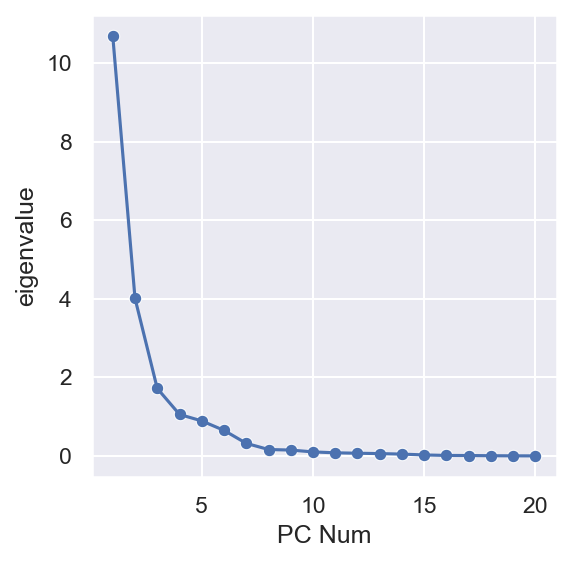

In [70]:
# Creating a scree plot
sns.lineplot(
    data = eigval_df,
    x = 'PC Num',
    y = 'eigenvalue'
)

sns.scatterplot(
    data = eigval_df,
    x = 'PC Num',
    y = 'eigenvalue'
)

plt.grid(True);

There are significant decreases between PCs 1 and 2, and PCs 2 and 3, and after that the decreases are less significant.
Let's look at the first 2 PCs.

### Visualize the data

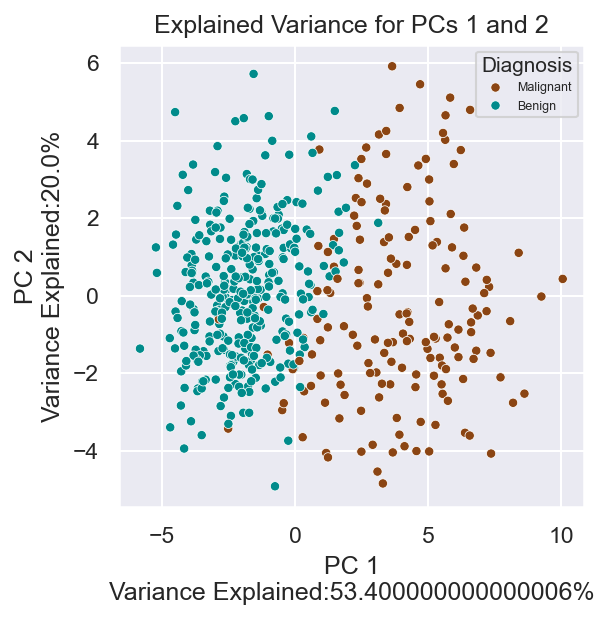

In [73]:
sns.scatterplot(
    data = z_df_pca,
    x = 'PC1',
    y = 'PC2',
    hue = np.where(z_df_pca['diagnosis'] == 1, 'Malignant', 'Benign'),
    s = 20,
    palette=['saddlebrown', 'darkcyan']
)

legend = plt.legend(title="Diagnosis", fontsize=6)
plt.setp(legend.get_title(),fontsize='small')

pc_var_exp = (df_pca_2.explained_variance_ / sum(df_pca_2.explained_variance_)).round(3) * 100

plt.xlabel(f'PC 1\nVariance Explained:{str(pc_var_exp[0]) + "%"}')
plt.ylabel(f'PC 2\nVariance Explained:{str(pc_var_exp[1].round(1)) + "%"}')
plt.title('Explained Variance for PCs 1 and 2')
plt.show();

### Calculate percentage of explained variation

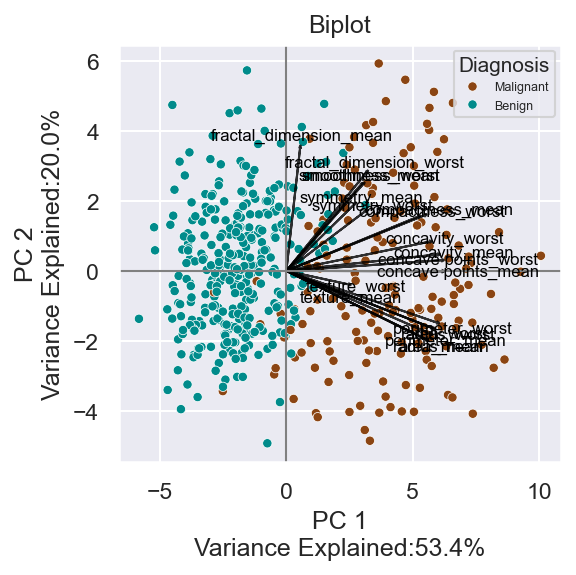

In [75]:
pc_var_exp = (df_pca_2.explained_variance_ / sum(df_pca_2.explained_variance_)).round(3) * 100

# Specifying the PCs to plot
PC_x = 1
PC_y = 2


# Biplot (again)
sns.scatterplot(
    data = z_df_pca,
    x = 'PC' + str(PC_x),
    y = 'PC' + str(PC_y),
    hue = np.where(z_df_pca['diagnosis'] == 1, "Malignant", "Benign"),
    s = 20,
    palette=['saddlebrown', 'darkcyan']
)

legend = plt.legend(title="Diagnosis", fontsize=6)
plt.setp(legend.get_title(),fontsize='small')

# Adding arrows and text for each original feature
for i, var in enumerate(df_pca_stan.columns):
    plt.arrow(0, 0, 
              df_pca_2.components_[PC_x - 1, i] * 2 * df_pca_2.explained_variance_[PC_x - 1], 
              df_pca_2.components_[PC_y - 1, i] * 2 * df_pca_2.explained_variance_[PC_y - 1], 
              color='black', alpha=0.8, head_width=0.05)
    
    plt.text(df_pca_2.components_[PC_x - 1, i] * 2.2 * df_pca_2.explained_variance_[PC_x - 1], 
             df_pca_2.components_[PC_y - 1, i] * 2.2 * df_pca_2.explained_variance_[PC_y - 1], 
             var, color='black', ha='center', va='center', fontsize = 8)


# Updating the x and y-axis labels
plt.xlabel(f'PC 1\nVariance Explained:{str(pc_var_exp[PC_x - 1].round(1)) + "%"}')
plt.ylabel(f'PC 2\nVariance Explained:{str(pc_var_exp[PC_y - 1].round(1)) + "%"}')


plt.title('Biplot')
plt.grid(True)
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.tight_layout()
plt.show();

## Interpreting PCs

### Looking at components in first 3 PCs

In [78]:
PC_loadings = pd.DataFrame(
    df_pca_2.components_,
    index = ['PC' + str(i + 1) for i in np.arange(df_pca_stan.shape[1])],
    columns = df_pca_stan.columns
)

PC_loadings.iloc[0:3, :].round(3)

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
PC1        0.260         0.108           0.268      0.260            0.139   
PC2       -0.246        -0.086          -0.225     -0.244            0.308   
PC3       -0.093         0.671          -0.090     -0.090           -0.149   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
PC1             0.257           0.281                0.289          0.126   
PC2             0.199           0.059               -0.001          0.238   
PC3            -0.034          -0.020               -0.093         -0.067   

     fractal_dimension_mean  radius_worst  texture_worst  perimeter_worst  \
PC1                   0.026         0.273          0.116            0.280   
PC2                   0.439        -0.206         -0.049           -0.185   
PC3                   0.016        -0.060          0.678           -0.051   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
PC1       0.269             0.143              0.245            0.266   
PC2      -0.203             0.310              0.194            0.105   
PC3      -0.059            -0.004              0.070            0.053   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
PC1                 0.289           0.145                    0.149  
PC2                 0.038           0.212                    0.352  
PC3                -0.041           0.025                    0.094

### Make a Heatmap for easier viewing

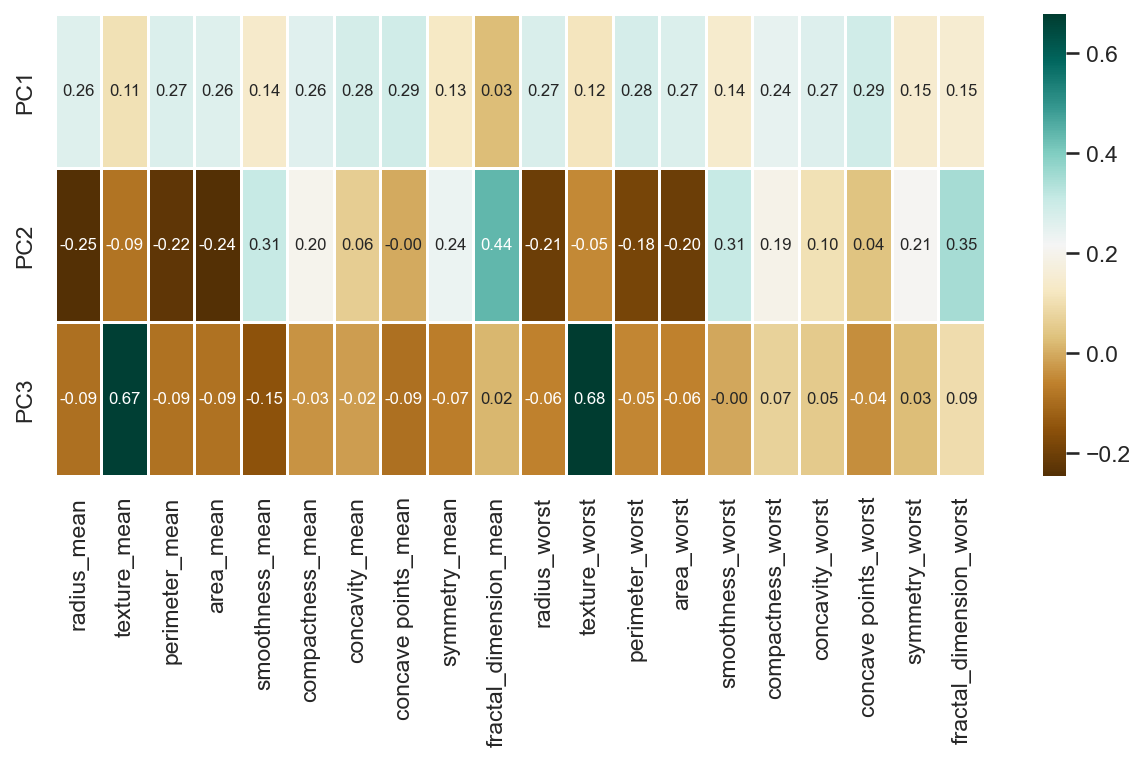

In [80]:
plt.figure(figsize = (10, 4))
sns.heatmap(
    data = PC_loadings.iloc[0:3, :],
    annot = True,
    annot_kws={"size": 8},
    fmt = '.2f',
    cmap = 'BrBG',
    linewidths = 0.5,
    linecolor = 'white'
);

Unfortunately we do not have a lot of very strong correlations

**PC1** appears to be the total size and concavity of the cells

**PC2** appears to be difference between (fractal dimension + smoothness) and total cell size (radius + perimeter + area)

**PC3** is the texture of the cell

### Split into training and testing for machine learning models

In [83]:
# series of training index rows
train_set = pd.Series(np.arange(0, len(z_df_pca))).sample(round(0.75*len(z_df_pca)), random_state = 3870)

## The two training sets:
# X features and PCs
df_pca_train = df_pca_stan.reset_index(drop = True).iloc[train_set]#.drop(columns = 'sex')
pc_train = z_df_pca.reset_index(drop = True).iloc[train_set].drop(columns = 'diagnosis')

# Response
y_train = df_pca.reset_index(drop = True).iloc[train_set]['diagnosis']

## The two testing sets
# X features and PCs
df_pca_test = df_pca_stan.reset_index(drop = True).drop(index = train_set)#, columns = 'sex')
pc_test = z_df_pca.reset_index(drop = True).drop(index = train_set, columns = 'diagnosis')

# Response
y_test = df_pca.reset_index(drop = True).drop(index = train_set)['diagnosis']

y_train, y_test

(103    1
 206    0
 219    1
 94     0
 363    0
       ..
 359    1
 309    0
 381    0
 51     0
 173    1
 Name: diagnosis, Length: 380, dtype: int32,
 1      1
 5      1
 9      1
 14     1
 19     1
       ..
 487    0
 490    0
 493    0
 496    0
 506    1
 Name: diagnosis, Length: 127, dtype: int32)


## SVM Model


This supervised machine learning algorithm is used a lot for classification. It finds the optimal hyperplane in the N-dimensional space to separate data points to different classes. It maximizes the margin between the closest points of different classes. For this model we use a linear kernel since the data is linearly separable. 

The two different classes for our data are malignant and benign. We will use the features texture_mean and area_mean to classify the tumors into these classes. 





Split between malignant and benign
reference - https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python
initially split data into train and test 


In [85]:
#split into features and target
X = df[['texture_mean', 'area_mean']]
Y = df['diagnosis']
print(X)

     texture_mean  area_mean
0           10.38     1001.0
1           17.77     1326.0
2           21.25     1203.0
3           20.38      386.1
4           14.34     1297.0
..            ...        ...
564         22.39     1479.0
565         28.25     1261.0
566         28.08      858.1
567         29.33     1265.0
568         24.54      181.0

[569 rows x 2 columns]


In [86]:
#split data to training and test data


# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=109) #70% training
print(X_train.dtypes)  # Check data types
print(X_train.isnull().sum())  

texture_mean    float64
area_mean       float64
dtype: object
texture_mean    0
area_mean       0
dtype: int64


Geneate model

In [88]:

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

### Evaluate model

In [90]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))


Accuracy: 0.9181286549707602
Precision: 0.9454545454545454
Recall: 0.8253968253968254


The accuracy is fairly high, there may be some overfitting going on. The model predicts the positive class very well, meaning very few false positives. Out of all the actual positives, it does a decent job since recall is 82.5%. Considering choosing just benign all the time it would be 64% accurate, this is a pretty good recall, accuracy, and precision rate overall.



### Using PCs

In [93]:
# series of training index rows
train_set = pd.Series(np.arange(0, len(z_df_pca))).sample(round(0.75*len(z_df_pca)), random_state = 3870)

## The two training sets:
# X features and PCs
df_pca_train = df_pca_stan.reset_index(drop = True).iloc[train_set]#.drop(columns = 'sex')
pc_train = z_df_pca.reset_index(drop = True).iloc[train_set].drop(columns = 'diagnosis')

# Response
y_train = df_pca.reset_index(drop = True).iloc[train_set]['diagnosis']

## The two testing sets
# X features and PCs
df_pca_test = df_pca_stan.reset_index(drop = True).drop(index = train_set)#, columns = 'sex')
pc_test = z_df_pca.reset_index(drop = True).drop(index = train_set, columns = 'diagnosis')

# Response
y_test = df_pca.reset_index(drop = True).drop(index = train_set)['diagnosis']

y_train, y_test

(103    1
 206    0
 219    1
 94     0
 363    0
       ..
 359    1
 309    0
 381    0
 51     0
 173    1
 Name: diagnosis, Length: 380, dtype: int32,
 1      1
 5      1
 9      1
 14     1
 19     1
       ..
 487    0
 490    0
 493    0
 496    0
 506    1
 Name: diagnosis, Length: 127, dtype: int32)

In [94]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(pc_train[['PC1', 'PC2']], y_train)

#Predict the response for test dataset
y_pred = clf.predict(pc_test[['PC1', 'PC2']])

y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

Illustrate model of PC's SVM

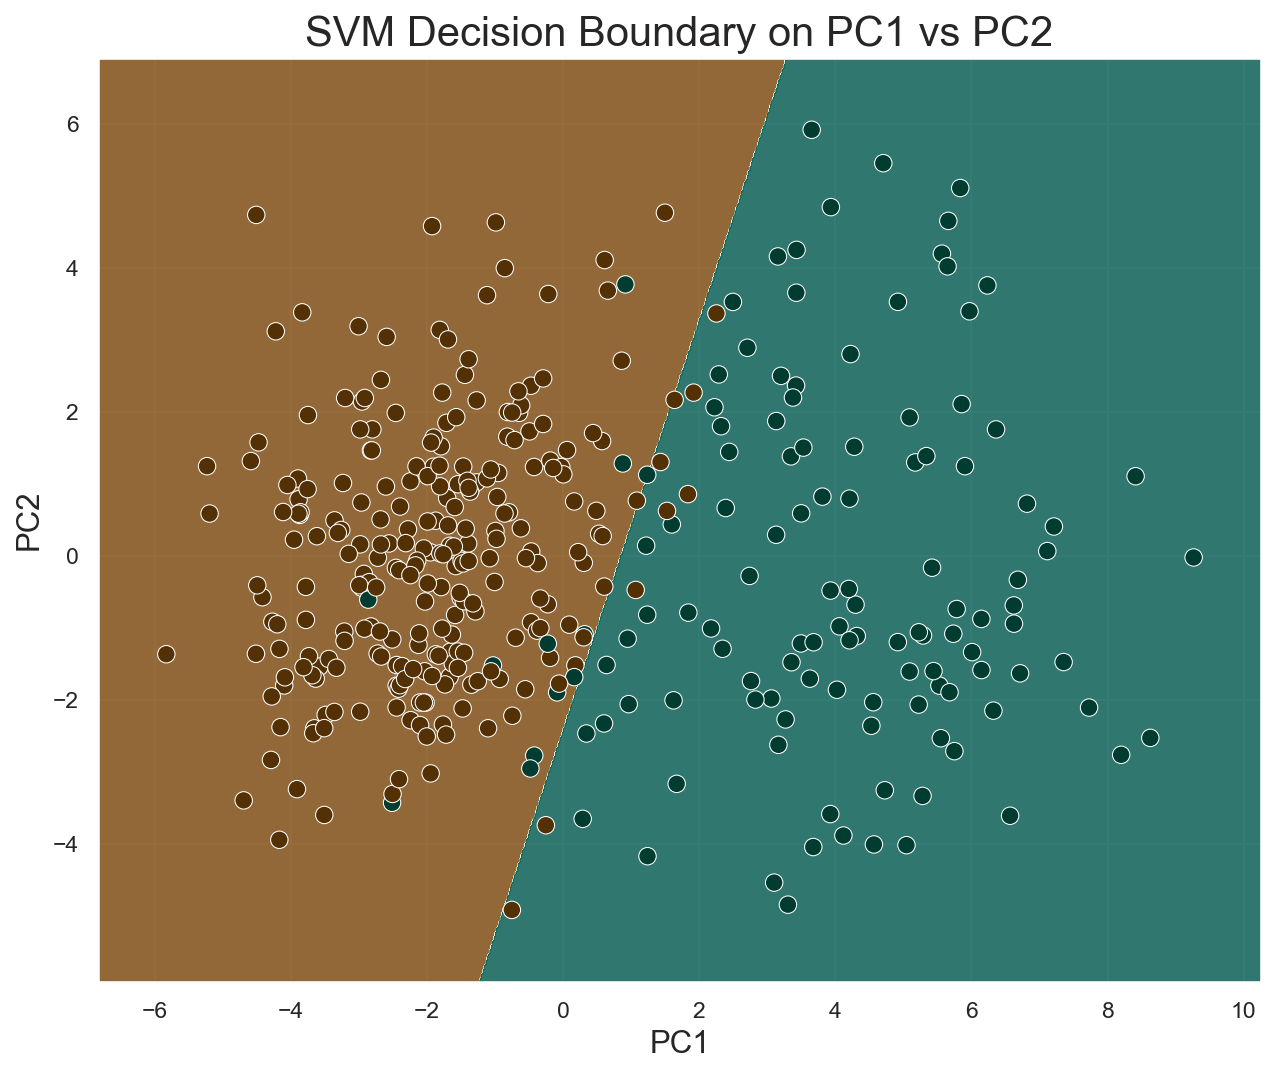

In [96]:
# Create a mesh to plot decision boundary
h = 0.02  # Step size in the mesh
x_min, x_max = pc_train['PC1'].min() - 1, pc_train['PC1'].max() + 1
y_min, y_max = pc_train['PC2'].min() - 1, pc_train['PC2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the label for each point in mesh
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
plt.figure(figsize=(10,8))
plt.contourf(xx, yy, Z, cmap='BrBG', alpha=0.8)

# Scatter plot the training data points
plt.scatter(pc_train['PC1'], pc_train['PC2'], 
            c=y_train, cmap='BrBG', edgecolors='white', s=70, linewidth=0.5)

plt.title('SVM Decision Boundary on PC1 vs PC2', fontsize=20)
plt.xlabel('PC1', fontsize=15)
plt.ylabel('PC2', fontsize=15)
plt.show()

In [97]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9448818897637795
Precision: 0.8888888888888888
Recall: 0.9523809523809523


## KNN

To start with KNN we decided to use two column values that are not correlated that much. As a result we chose perimeter and concave points. We will create a scatter plot to see if these would be good to use for KNN, meaning if the results are clustered more. 


https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn
https://www.statology.org/pandas-loc-multiple-columns/


In [99]:
df.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

Scatterplot to view the features with if it's cancerous or not

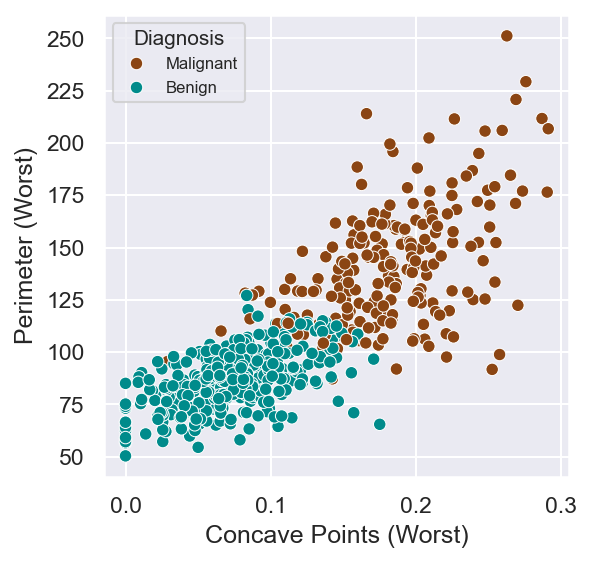

In [101]:
sns.scatterplot(x=df['concave points_worst'], y=df['perimeter_worst'], 
                hue=np.where(df['diagnosis'] == 1, 'Malignant', 'Benign'), 
                palette=['saddlebrown', 'darkcyan'])

legend = plt.legend(title="Diagnosis", fontsize=8)
plt.setp(legend.get_title(),fontsize='small')
plt.ylabel('Perimeter (Worst)')
plt.xlabel('Concave Points (Worst)')
plt.show();

Clearly the two groups of malignant and benign are all clustered close to each other. This would be a good candidate for a KNN model since the category of the new data point is based off of its closest neighbors. 

After locking in the training sets, we will test out the model with a k value of 3 to start to see how well it does. 


In [103]:
X = df.loc[:, ['concave points_worst', 'perimeter_worst']]
Y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Scale features with StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Fit and evaluate a model, let k be 3 for this

In [105]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [106]:


y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9473684210526315


This accuracy is fairly good. Although this seems like a pretty good value of k chosen, we will evaluate to see if there are any better choices for k. We will loop through a range of 200 k values to see the results

In [108]:
# FINDING THE BEST K VALUE

To get a better idea of the best k value, we will plot the k values versus their accuracy scores. There should be a drop-off point which will let us know what the best k value will be. 

In [110]:


k_values = [i for i in range (1,200)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, Y, cv=5)
    scores.append(np.mean(score))

In [111]:
# PLOT THE RESULTS

Text(0, 0.5, 'Accuracy Score')

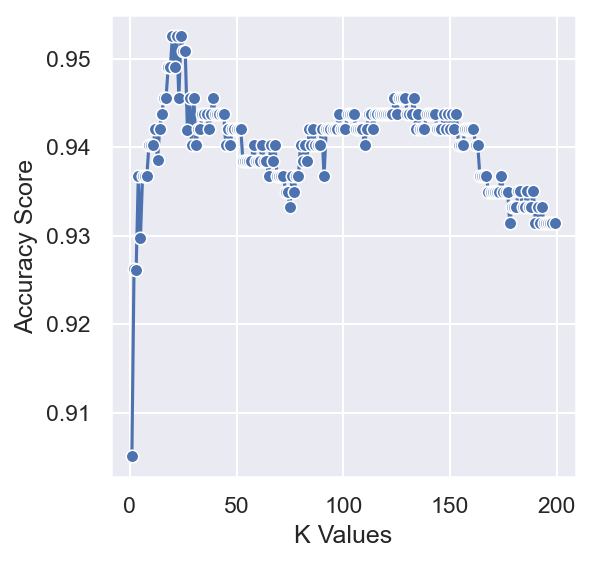

In [112]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

To find the best k value, we will find the max accuracy, and use that k value for our model. We will then train the model and then check out the accuracy, precision, and recall. 

In [114]:
# CHOOSE THE BEST K VALUE

In [115]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=24)

The plot tells us that the  best K-value to use is 24.

In [117]:
# EVALUATE ACCURACY, PERCISION, AND RECALL

In [118]:


y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.956140350877193
Precision: 0.9523809523809523
Recall: 0.9302325581395349


All of these values hold pretty high values, indicating the model fits well. Install mlxtend so we can do a decision boundary plot. 

Below we plot the decision boundary to see how well the KNN did classifying items. 


### Plot decision boundary

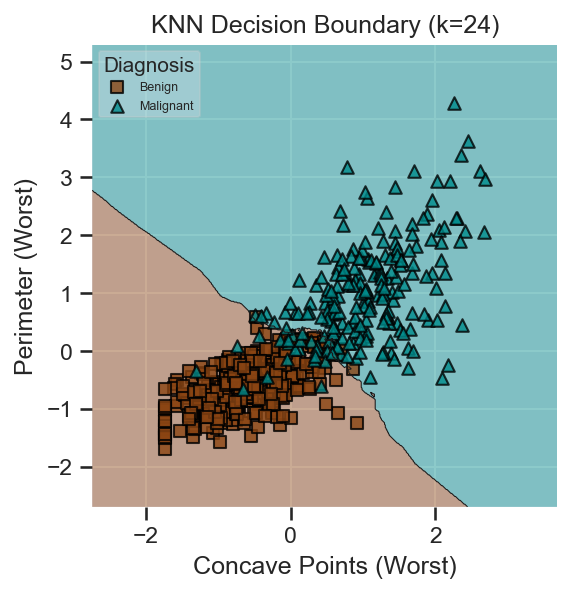

In [121]:
# Recombine scaled full feature set for X and Y
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X, Y)

# Plot decision boundary
plot_decision_regions(X, Y.to_numpy(), clf=knn, legend=2, colors='saddlebrown,darkcyan')

plt.xlabel('Concave Points (Worst)')
plt.ylabel('Perimeter (Worst)')
plt.title(f'KNN Decision Boundary (k={best_k})')

handles, labels = plt.gca().get_legend_handles_labels()
legend = plt.legend(handles,
                    ['Benign', 'Malignant'],
                    title="Diagnosis", 
                    fontsize=6,
                    framealpha=0.3, scatterpoints=1)
plt.setp(legend.get_title(),fontsize='small')

plt.show();


Clearly based off the graph, it appears that the graph model does very well. Only a handful of each malignant and benign are misclassified.

### Using PCs

In [124]:
# series of training index rows
train_set = pd.Series(np.arange(0, len(z_df_pca))).sample(round(0.75*len(z_df_pca)), random_state = 3870)

X = z_df_pca[['PC1', 'PC2']]
Y = z_df_pca['diagnosis']

## The two training sets:
# X features and PCs
df_pca_train = df_pca_stan.reset_index(drop = True).iloc[train_set]#.drop(columns = 'sex')
pc_train = z_df_pca.reset_index(drop = True).iloc[train_set].drop(columns = 'diagnosis')

# Response
y_train = df_pca.reset_index(drop = True).iloc[train_set]['diagnosis']

## The two testing sets
# X features and PCs
df_pca_test = df_pca_stan.reset_index(drop = True).drop(index = train_set)#, columns = 'sex')
pc_test = z_df_pca.reset_index(drop = True).drop(index = train_set, columns = 'diagnosis')

# Response
y_test = df_pca.reset_index(drop = True).drop(index = train_set)['diagnosis']

y_train, y_test

(103    1
 206    0
 219    1
 94     0
 363    0
       ..
 359    1
 309    0
 381    0
 51     0
 173    1
 Name: diagnosis, Length: 380, dtype: int32,
 1      1
 5      1
 9      1
 14     1
 19     1
       ..
 487    0
 490    0
 493    0
 496    0
 506    1
 Name: diagnosis, Length: 127, dtype: int32)

In [125]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(pc_train[['PC1', 'PC2']], y_train)

KNeighborsClassifier(n_neighbors=3)

In [126]:
y_pred = knn.predict(pc_test[['PC1', 'PC2']])

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9448818897637795


In [127]:
k_values = [i for i in range (1,200)]
scores = []

# scaler = StandardScaler()
# X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, Y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

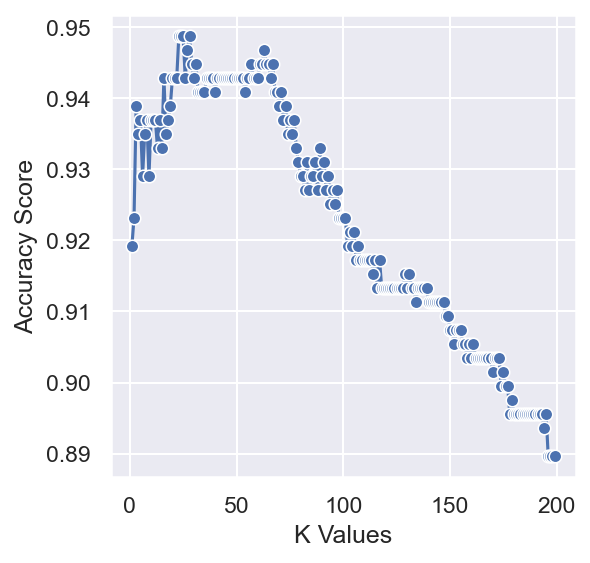

In [128]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [129]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(pc_train[['PC1', 'PC2']], y_train)

KNeighborsClassifier(n_neighbors=23)

In [130]:
y_pred = knn.predict(pc_test[['PC1', 'PC2']])

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9291338582677166
Precision: 0.9230769230769231
Recall: 0.8571428571428571


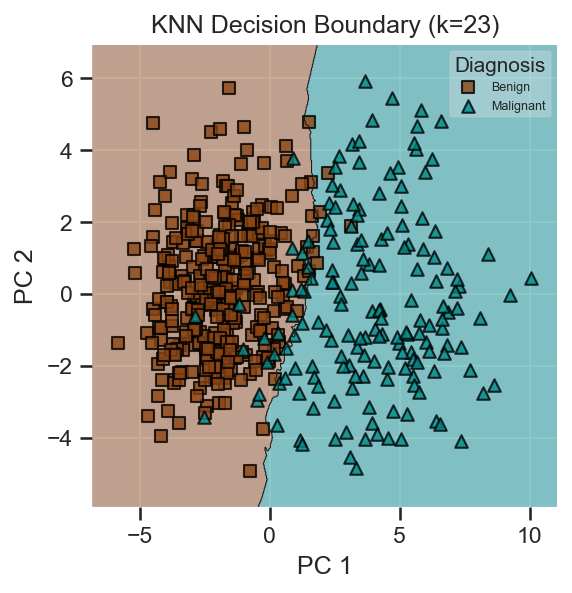

In [131]:
# Recombine scaled full feature set for X and Y
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X, Y)

# Plot decision boundary
plot_decision_regions(X.to_numpy(), Y.to_numpy(), clf=knn, legend=2, colors='saddlebrown,darkcyan')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title(f'KNN Decision Boundary (k={best_k})')

handles, labels = plt.gca().get_legend_handles_labels()
legend = plt.legend(handles,
                    ['Benign', 'Malignant'],
                    title="Diagnosis", 
                    fontsize=6,
                    framealpha=0.3, scatterpoints=1)
plt.setp(legend.get_title(),fontsize='small')

plt.show();

## Visualization
Using the features found in a correlation matrix, we will count how many of each diagnosis there are for future reference. We will use the concave_points and parameter_mean as the main features to visualize the data. You see a distinct separation of data, indicating that a classification tree would be a good idea on this data. 


In [133]:
cancer_data = pd.read_csv("data.csv")
cancer_data['diagnosis'] = np.where(cancer_data['diagnosis'] == 'M', 'Malignant', 'Benign')
cancer_data['diagnosis'].value_counts()


diagnosis
Benign       357
Malignant    212
Name: count, dtype: int64

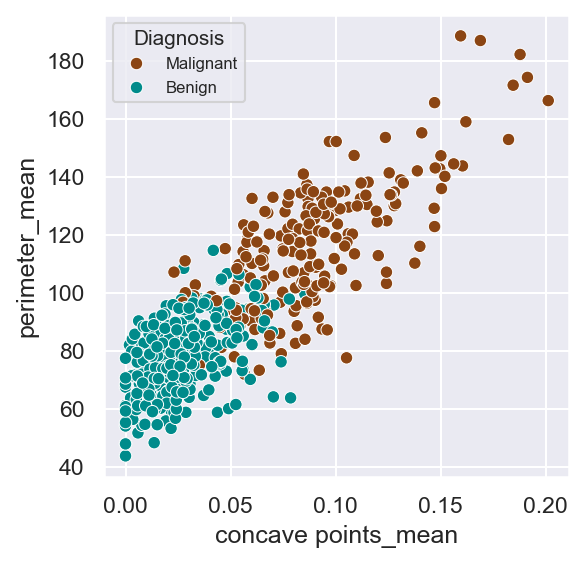

In [134]:
# Make scatterplot
sns.scatterplot(data = cancer_data, x = 'concave points_mean', y = 'perimeter_mean', 
                hue = 'diagnosis', palette=['saddlebrown', 'darkcyan'])
legend = plt.legend(title="Diagnosis", fontsize=8)
plt.setp(legend.get_title(),fontsize='small');

## Classification Tree



Split data into training and testing sets

In [137]:
X_train, X_test, y_train, y_test = (
    train_test_split(
        cancer_data.drop(columns = ['diagnosis'], axis = 1), 
        cancer_data['diagnosis'],
        test_size = 0.20, 
        random_state = 3870)
)

X_train

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
25      852631       17.140         16.40          116.00      912.7   
20     8510653       13.080         15.71           85.63      520.0   
206     879804        9.876         17.27           62.92      295.4   
404     904969       12.340         14.95           78.29      469.1   
455    9112085       13.380         30.72           86.34      557.2   
..         ...          ...           ...             ...        ...   
419     906290       11.160         21.41           70.95      380.3   
360  901034302       12.540         18.07           79.42      491.9   
161    8711803       19.190         15.94          126.30     1157.0   
413     905557       14.990         22.11           97.53      693.7   
80      861103       11.450         20.97           73.81      401.5   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
25           0.11860           0.22760        0.222900             0.140100   
20           0.10750           0.12700        0.045680             0.031100   
206          0.10890           0.07232        0.017560             0.019520   
404          0.08682           0.04571        0.021090             0.020540   
455          0.09245           0.07426        0.028190             0.032640   
..               ...               ...             ...                  ...   
419          0.10180           0.05978        0.008955             0.010760   
360          0.07436           0.02650        0.001194             0.005449   
161          0.08694           0.11850        0.119300             0.096670   
413          0.08515           0.10250        0.068590             0.038760   
80           0.11020           0.09362        0.045910             0.022330   

     symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
25          0.3040  ...          21.40           152.40      1461.0   
20          0.1967  ...          20.49            96.09       630.5   
206         0.1934  ...          23.22            67.08       331.6   
404         0.1571  ...          16.85            84.11       533.1   
455         0.1375  ...          41.61            96.69       705.6   
..             ...  ...            ...              ...         ...   
419         0.1615  ...          28.92            79.26       458.0   
360         0.1528  ...          20.98            86.82       585.7   
161         0.1741  ...          17.81           146.60      1495.0   
413         0.1944  ...          31.55           110.20       867.1   
80          0.1842  ...          32.16            84.53       525.1   

     smoothness_worst  compactness_worst  concavity_worst  \
25            0.15450            0.39490         0.385300   
20            0.13120            0.27760         0.189000   
206           0.14150            0.12470         0.062130   
404           0.10480            0.06744         0.049210   
455           0.11720            0.14210         0.070030   
..                ...                ...              ...   
419           0.12820            0.11080         0.035820   
360           0.09293            0.04327         0.003581   
161           0.11240            0.20160         0.226400   
413           0.10770            0.33450         0.311400   
80            0.15570            0.16760         0.175500   

     concave points_worst  symmetry_worst  fractal_dimension_worst  \
25                0.25500          0.4066                  0.10590   
20                0.07283          0.3184                  0.08183   
206               0.05588          0.2989                  0.07380   
404               0.04793          0.2298                  0.05974   
455               0.07763          0.2196                  0.07675   
..                    ...             ...                      ...   
419               0.04306          0.2976                  0.07123   
360               0.01635          0.2233           

We will make sure there is a good amount of each diagnosis in the training and in the testing data set, without having way more of one than the other relative to the ratio of the original data set. 

In [139]:
X_test

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
501     91504       13.820         24.49           92.33      595.9   
212   8810703       28.110         18.47          188.50     2499.0   
3    84348301       11.420         20.38           77.58      386.1   
378   9013594       13.660         15.15           88.27      580.6   
552    924084       12.770         29.43           81.35      507.9   
..        ...          ...           ...             ...        ...   
241    883539       12.420         15.04           78.61      476.5   
357    901028       13.870         16.21           88.52      593.7   
202    878796       23.290         26.67          158.90     1685.0   
99     862548       14.420         19.77           94.48      642.5   
557    925236        9.423         27.88           59.26      271.3   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
501          0.11620           0.16810         0.13570              0.06759   
212          0.11420           0.15160         0.32010              0.15950   
3            0.14250           0.28390         0.24140              0.10520   
378          0.08268           0.07548         0.04249              0.02471   
552          0.08276           0.04234         0.01997              0.01499   
..               ...               ...             ...                  ...   
241          0.07926           0.03393         0.01053              0.01108   
357          0.08743           0.05492         0.01502              0.02088   
202          0.11410           0.20840         0.35230              0.16200   
99           0.09752           0.11410         0.09388              0.05839   
557          0.08123           0.04971         0.00000              0.00000   

     symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
501         0.2275  ...          32.94           106.00       788.0   
212         0.1648  ...          18.47           188.50      2499.0   
3           0.2597  ...          26.50            98.87       567.7   
378         0.1792  ...          19.64            97.96       657.0   
552         0.1539  ...          36.00            88.10       594.7   
..             ...  ...            ...              ...         ...   
241         0.1546  ...          20.37            83.85       543.4   
357         0.1424  ...          25.58            96.74       694.4   
202         0.2200  ...          32.68           177.00      1986.0   
99          0.1879  ...          30.86           109.50       826.4   
557         0.1742  ...          34.24            66.50       330.6   

     smoothness_worst  compactness_worst  concavity_worst  \
501            0.1794            0.39660          0.33810   
212            0.1142            0.15160          0.32010   
3              0.2098            0.86630          0.68690   
378            0.1275            0.31040          0.25690   
552            0.1234            0.10640          0.08653   
..                ...                ...              ...   
241            0.1037            0.07776          0.06243   
357            0.1153            0.10080          0.05285   
202            0.1536            0.41670          0.78920   
99             0.1431            0.30260          0.31940   
557            0.1073            0.07158          0.00000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  \
501               0.15210          0.3651                  0.11830   
212               0.15950          0.1648                  0.05525   
3                 0.25750          0.6638                  0.17300   
378               0.10540          0.3387                  0.09638   
552               0.06498          0.2407                  0.06484   
..                    ...             ...                      ...   
241               0.04052          0.2901                  0.06783   
357               0.05556          0.2362                  0.07

In [140]:
y_train.value_counts(), y_test.value_counts()

(diagnosis
 Benign       287
 Malignant    168
 Name: count, dtype: int64,
 diagnosis
 Benign       70
 Malignant    44
 Name: count, dtype: int64)

We will use the data to create a classification tree. We decided to use the Gini as the way to make the decisions on the splits. We decided to focus more on the concave_points_mean and perimeter_mean for the tree due to them not being highly correlated to each other. 

In [142]:
# Fitting the tree to the data
cancer_tree = (
    tree.DecisionTreeClassifier(criterion = 'gini', random_state = 3870)
    .fit(X_train[['concave points_mean', 'perimeter_mean']],y_train)
)

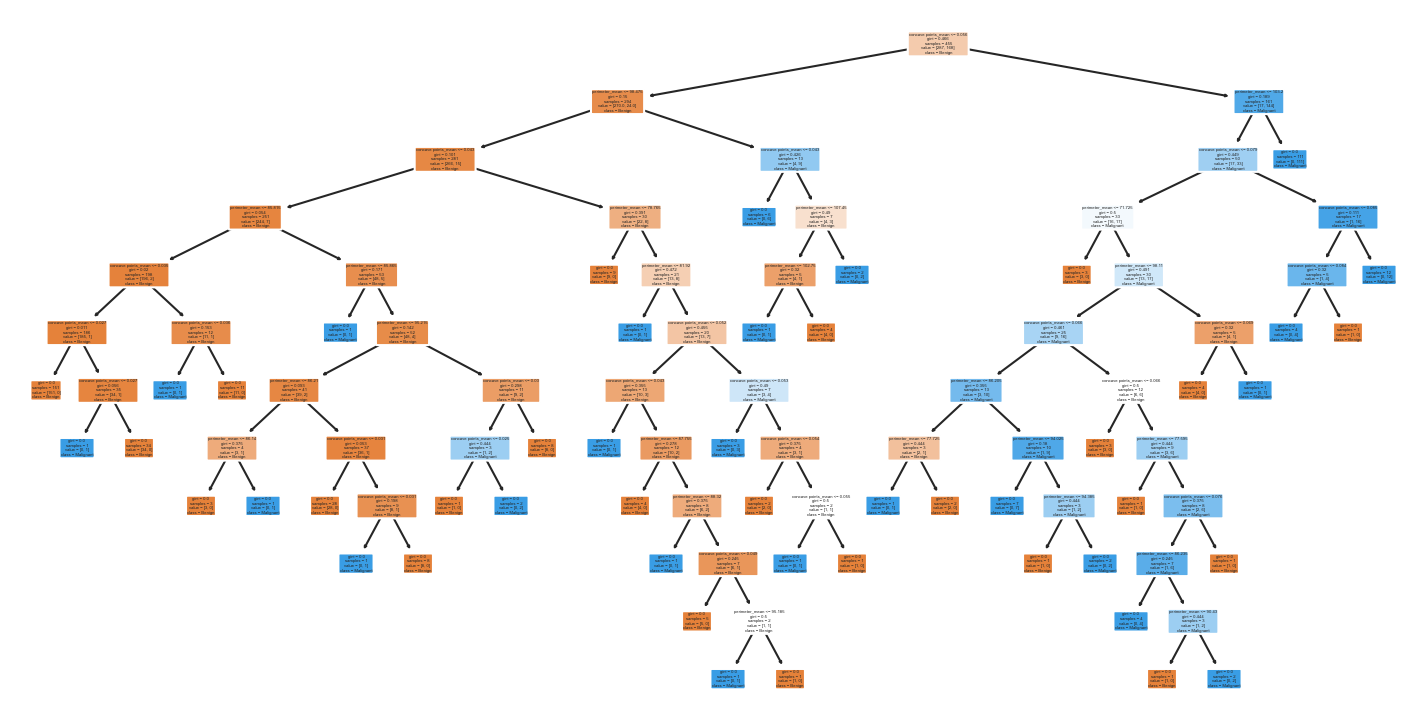

In [143]:
# Plotting the tree
plt.figure(figsize = [12, 6])
tree.plot_tree(
    cancer_tree, # Model
    feature_names = ['concave points_mean', 'perimeter_mean'],
    class_names = np.unique(y_train),
    filled = True,
    rounded = True
)
plt.show()

The decision tree looks very large since we have not done any pruning yet. First, we will take a look to see how the decision tree does on both the training and testing data. 

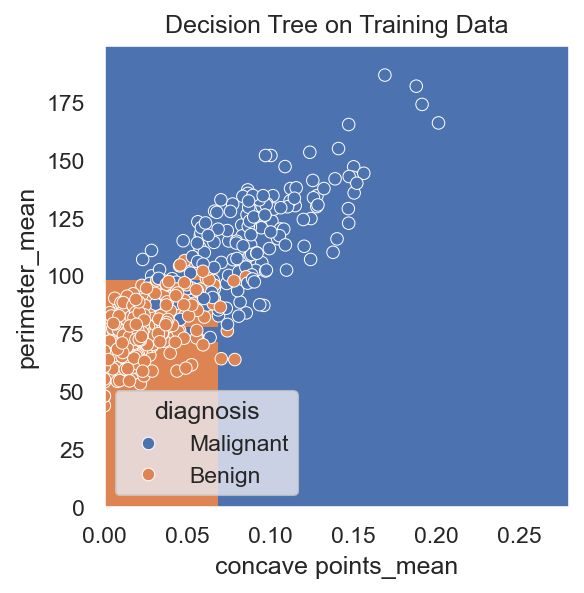

In [145]:

sns_cmap = ListedColormap(np.array(sns.color_palette())[0:2, :]).reversed()

xx, yy = np.meshgrid(np.arange(0, 0.3, 0.02), np.arange(0, 200, 0.02))
Z_string = cancer_tree.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns = ['concave points_mean', 'perimeter_mean']))
categories, Z_int = np.unique(Z_string, return_inverse = True)
Z_int = Z_int.reshape(xx.shape)
plt.contourf(xx, yy, Z_int, cmap = sns_cmap)
sns.scatterplot(data = X_train, x = 'concave points_mean', y = 'perimeter_mean', hue = y_train)
plt.title('Decision Tree on Training Data');

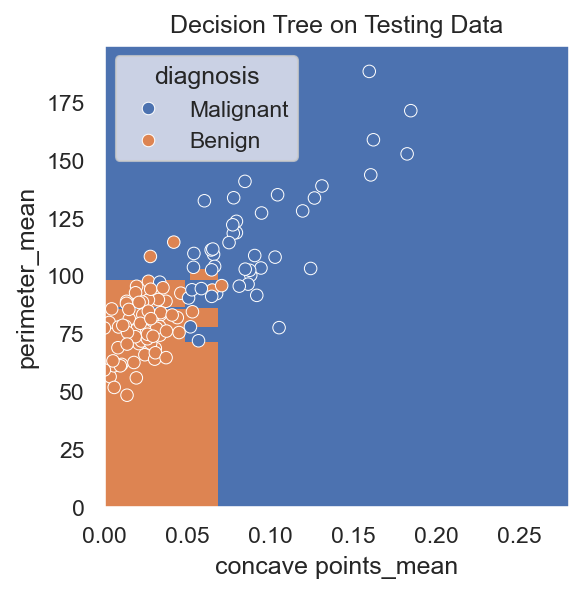

In [146]:
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:2, :]).reversed()

xx, yy = np.meshgrid(np.arange(0, 0.3, 0.02), np.arange(0, 200, 0.02))
Z_string = cancer_tree.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns = ['concave points_mean', 'perimeter_mean']))
categories, Z_int = np.unique(Z_string, return_inverse = True)
Z_int = Z_int.reshape(xx.shape)
plt.contourf(xx, yy, Z_int, cmap = sns_cmap)
sns.scatterplot(data = X_test, x = 'concave points_mean', y = 'perimeter_mean', hue = y_test)
plt.title('Decision Tree on Testing Data');

In [147]:
ct_training_accuracy = cancer_tree.score(X_train[['concave points_mean', 'perimeter_mean']], y_train)
ct_test_accuracy = cancer_tree.score(X_test[['concave points_mean', 'perimeter_mean']], y_test)
round(ct_training_accuracy, 3), round(ct_test_accuracy, 3)

(1.0, 0.895)

The training graph did not seem to be super overfit, causing the testing data to appear to have done a good job in the graph. There do not appear to be many mistakes. 

### Pruning
Based of the classification trees, we will collect the different ccp alpha values from the tree. This will help us decide where to prune the tree.

In [150]:
cancer_ccp_alphas = (
    cancer_tree       # model
    .cost_complexity_pruning_path(X_train[['concave points_mean', 'perimeter_mean']], 
                                  y_train) # Finding the results for each split point
    .ccp_alphas # Getting just the ccp_alphas
)

cancer_ccp_alphas

array([0.        , 0.00164835, 0.0018315 , 0.00188383, 0.00197802,
       0.00206852, 0.00209059, 0.0021756 , 0.00251177, 0.00256927,
       0.0027865 , 0.0029304 , 0.00321368, 0.00351648, 0.00351648,
       0.00354579, 0.00384948, 0.00401884, 0.00401884, 0.00463712,
       0.00671578, 0.00895121, 0.01751635, 0.02229581, 0.30208108])

We will then create a graph looping through the CCP alpha values trees and the number of nodes. 


In [152]:
# List to store the models
trees = []

# Looping through the different choices of ccp_alpha to create each tree
for alpha in cancer_ccp_alphas:
    # Starting the tree engine
    tree_loop = tree.DecisionTreeClassifier(random_state = 3870, criterion='gini', ccp_alpha=alpha)
    # Fitting the engine to the model
    tree_loop.fit(X_train[['concave points_mean', 'perimeter_mean']], y_train)
    # Adding the fitted model to the tree list
    trees.append(tree_loop)

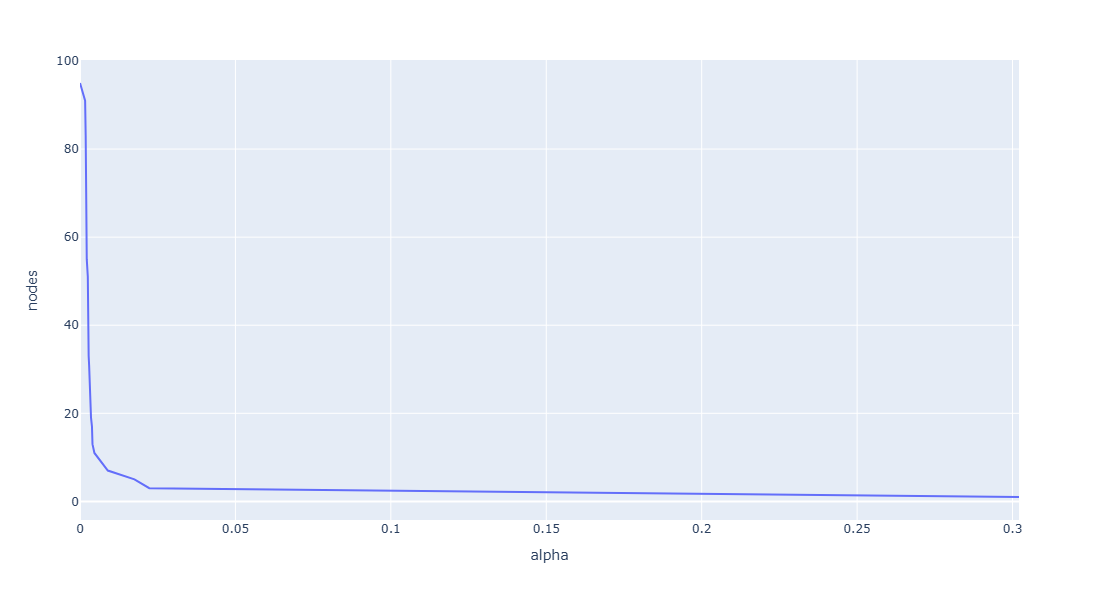

In [153]:
# Plotting the alpha value vs number of nodes
px.line(
    # Creating a data frame with num of nodes and the alpha value
    pd.DataFrame({
        'nodes': [tree.tree_.node_count for tree in trees],
        'alpha': cancer_ccp_alphas
    }),
    x = 'alpha',
    y = 'nodes',
    height = 600
).show();

You can see that the number of nodes drastically drops after an alpha value very close to 0. 
To test and decide the best alpha value, we will graph the accuracy of these different trees pruned at their different values. 


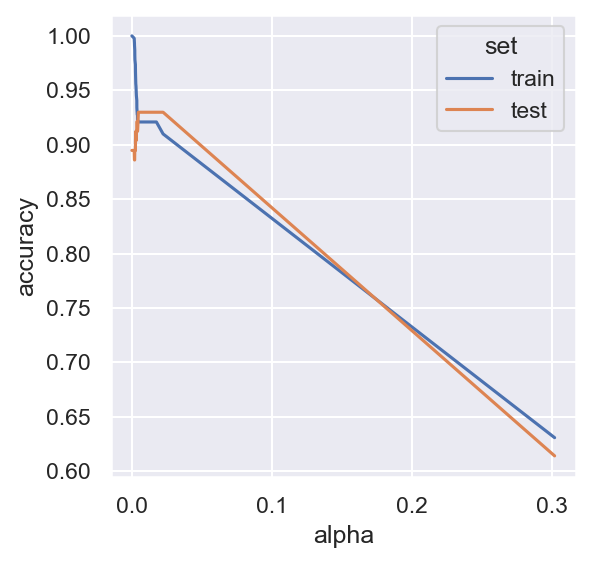

In [155]:
# Data set for the different choices of alpha, training accuracy, and testing accuracy
pruning_df = pd.DataFrame({
    'alpha': cancer_ccp_alphas,  # Different choices of alpha
    'train': [tree.score(X_train[['concave points_mean', 'perimeter_mean']], y_train) for tree in trees], # Shortcut of the accuracy for training
    'test':  [tree.score(X_test[['concave points_mean', 'perimeter_mean']], y_test)   for tree in trees]  # Shortcut of the accuracy for testing
}).melt(id_vars = 'alpha', value_name = 'accuracy', var_name = 'set') # Stacking the train and test accuracy columns together


# Line graph to show how the accuracy changes
sns.lineplot(
    data = pruning_df,
    x = 'alpha',
    y = 'accuracy',
    hue = 'set'
)
plt.ylabel('accuracy');

You can see the point where the training data starts becoming overfit around 0.2 alpha values. This indicates it is best to choose an alpha value below that. We will want to choose one with the highest accuracy without overfitting around the 0.001 mark. To find the best accuracy, we will choose the highest accuracy value. And refit the tree.


In [157]:
best_alpha = (
  pruning_df
 .query('set == "test"') # Just looking at the accuracy of the test set
 .nlargest(columns = 'accuracy', n = 1) # Picking the row with the highest accuracy
)

best_alpha

alpha   set  accuracy
44  0.004637  test  0.929825

The best alpha for our data is 0.004637

Re-fit tree with best alpha value and plot

In [160]:
cancer_tree_pruned = (
    tree.DecisionTreeClassifier(
        criterion = 'gini', 
        ccp_alpha = best_alpha['alpha'].sum(),  # sum converts it from a series to a float
        random_state = 3870
    )
    .fit(X = X_train[['concave points_mean', 'perimeter_mean']], y = y_train)
)

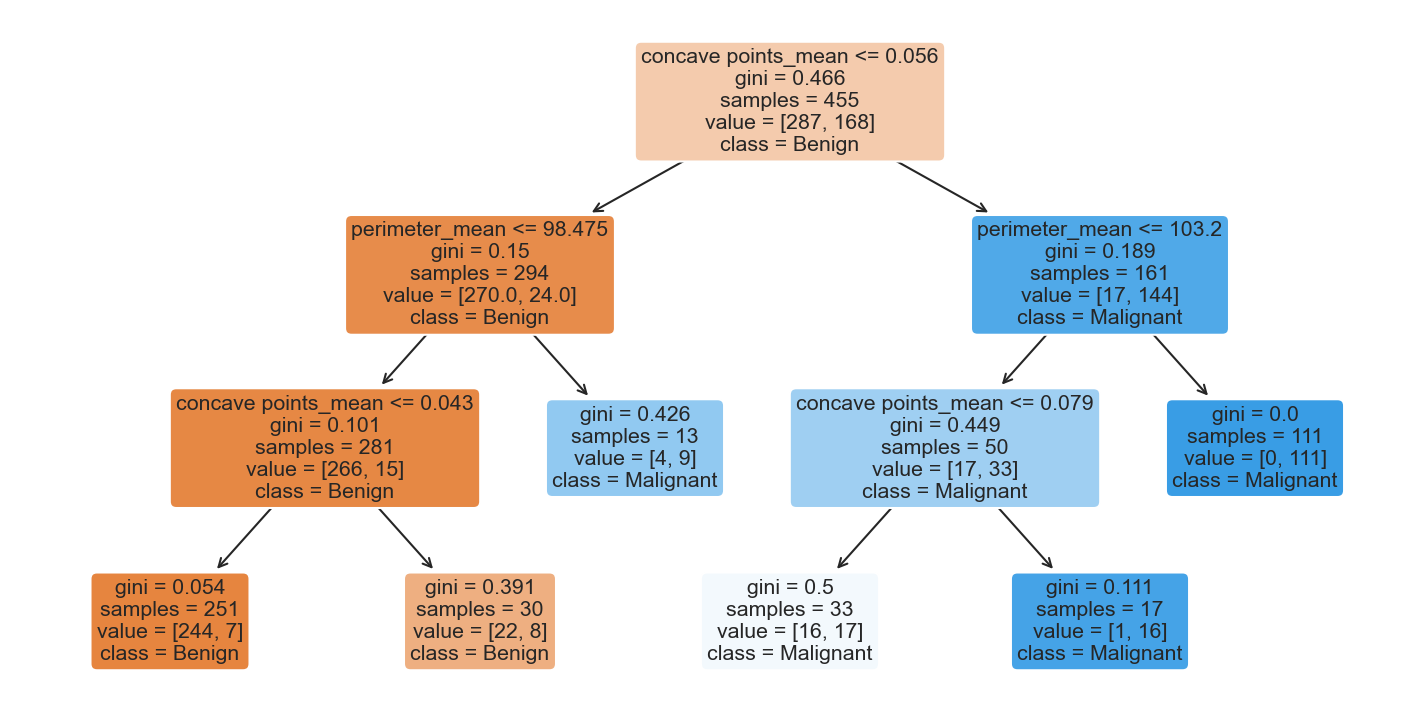

In [161]:
plt.figure(figsize = [12, 6])
tree.plot_tree(
    cancer_tree_pruned, # Model
    feature_names = ['concave points_mean', 'perimeter_mean'],
    class_names = np.unique(y_train),
    filled = True,
    rounded = True
)
plt.show()

This graph appears so much better than the initial one since it does not have as many nodes and different branches. We will draw the decision boundaries again to indicate how well it does with it. 

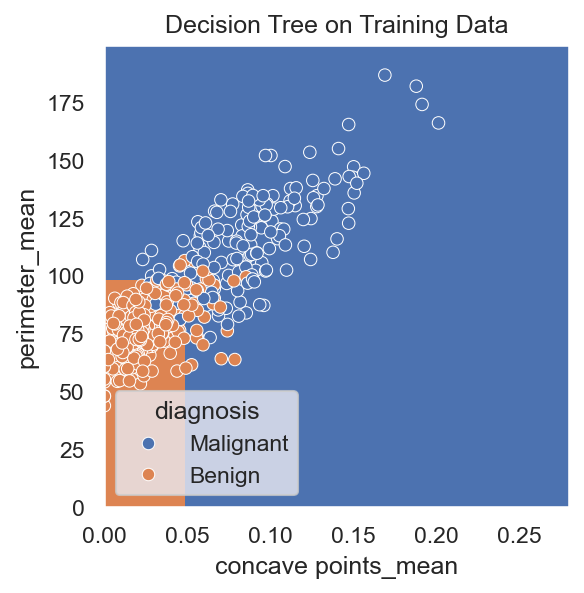

In [163]:
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:2, :]).reversed()

xx, yy = np.meshgrid(np.arange(0, 0.3, 0.02), np.arange(0, 200, 0.02))
Z_string = cancer_tree_pruned.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns = ['concave points_mean', 'perimeter_mean']))
categories, Z_int = np.unique(Z_string, return_inverse = True)
Z_int = Z_int.reshape(xx.shape)
plt.contourf(xx, yy, Z_int, cmap = sns_cmap)
sns.scatterplot(data = X_train, x = 'concave points_mean', y = 'perimeter_mean', hue = y_train)
plt.title('Decision Tree on Training Data');

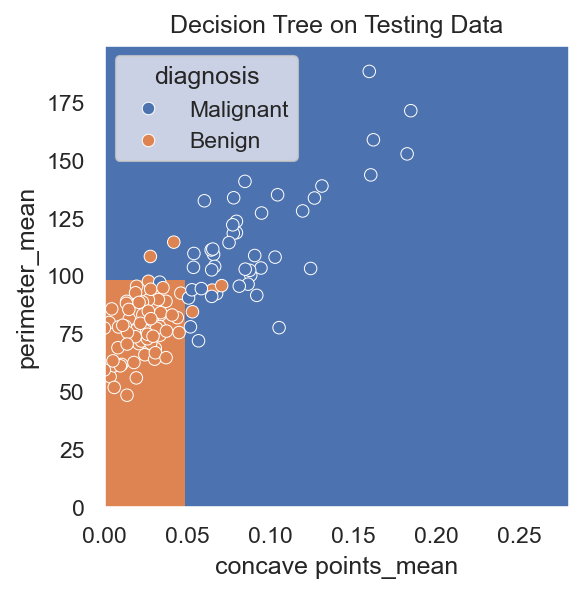

In [164]:
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:2, :]).reversed()

xx, yy = np.meshgrid(np.arange(0, 0.3, 0.02), np.arange(0, 200, 0.01))
Z_string = cancer_tree_pruned.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns = ['concave points_mean', 'perimeter_mean']))
categories, Z_int = np.unique(Z_string, return_inverse = True)
Z_int = Z_int.reshape(xx.shape)
plt.contourf(xx, yy, Z_int, cmap = sns_cmap)
sns.scatterplot(data = X_test, x = 'concave points_mean', y = 'perimeter_mean', hue = y_test)
plt.title('Decision Tree on Testing Data');

Again, these graphs indicate the data is not being overfit since the test data does not perform super badly. We can see this in the test and training accuracy calculated.

In [166]:
ct_training_accuracy = cancer_tree_pruned.score(X_train[['concave points_mean', 'perimeter_mean']], y_train)
ct_test_accuracy = cancer_tree_pruned.score(X_test[['concave points_mean', 'perimeter_mean']], y_test)
round(ct_training_accuracy, 3), round(ct_test_accuracy, 3)

(0.921, 0.93)

The testing tree does slightly improve from the training tree.

When doing the tree with the full feature set as a test it performs as well as the initial training set. This is somewhat expected as most of the data from the dataset is used for training anyway. 

### Draw Decision boundary with full feature set

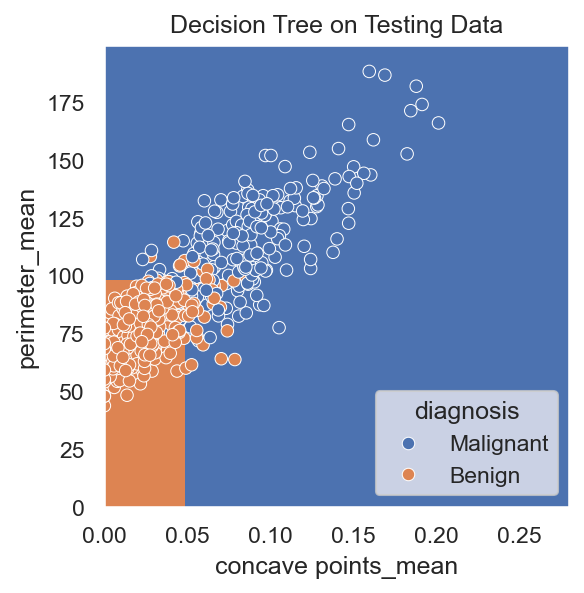

In [169]:
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:2, :]).reversed()

xx, yy = np.meshgrid(np.arange(0, 0.3, 0.02), np.arange(0, 200, 0.01))
Z_string = cancer_tree_pruned.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns = ['concave points_mean', 'perimeter_mean']))
categories, Z_int = np.unique(Z_string, return_inverse = True)
Z_int = Z_int.reshape(xx.shape)
plt.contourf(xx, yy, Z_int, cmap = sns_cmap)
sns.scatterplot(data = cancer_data, x = 'concave points_mean', y = 'perimeter_mean', hue = 'diagnosis')
plt.title('Decision Tree on Testing Data');

In [170]:
ct_accuracy = cancer_tree_pruned.score(cancer_data[['concave points_mean', 'perimeter_mean']], cancer_data['diagnosis'])
round(ct_accuracy, 3)

0.923

## Conclusion

In this project, we used various models to better understand the relationships between features in our dataset. Using random forest, we determined that the mean and worst concave points, the worst perimeter, and the worst area were the most important features when determining if a tumor was malignant. We used SVM to classify tumors texture_mean and area_mean to classify tumors as benign or malignant and got a 91.81% accuracy, 94.55% precision, and 82.54% recall. We used KNN to classify tumors using the features concave_points_worst and perimeter_worst and got 92.98% accuracy, 93.02% precision, and 88.89% recall. We used Gini index to split the data into benign and malignant groups and used decision trees. We decided to just use the perimeter_mean and concave_points_mean to be the features the tree would use. After pruning, the accuracy between the test and training was around 92.5%. For all these results, the accuracy indicates that we can accurately predict if a breast cancer scan is malignant. The fact that if we decided 


## Limitations

We wanted to use linear regression to analyze the trends in types of diagnosis as well as volume of diagnosis over the almost 3-year span of the study and use it to predict future trends, but were unable to due to the lack of time stamps in the data. There was also limited data in general, with only 507 patients after we cleaned the data. This could have affected our machine learning model’s accuracy as there were not a lot of instances of malignant diagnosis. We were also interested in looking at malignant diagnosis vs age, but the dataset did not contain the patients’ ages. 